# Load the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import statsmodels.formula.api as smf
from statsmodels.graphics.factorplots import interaction_plot
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn.metrics import mean_squared_error

# Load dataset

In [3]:
# Establish the file path.
file_path = 'MS9004_Assignment_2425s2.xlsx'
# Read the xls file.
df = pd.read_excel(file_path)

# Explore the data

In [5]:
# Display first 10 rows
display(df.head(10))
# Display last 10 rows
display(df.tail(10))
# To know the dimensions of the data matrix, type: df.shape
df.shape

risk  length   age  cultures   xray  bed  patient  nurse  facilities  \
0   4.1    7.13  55.7       9.0   39.6  279      207    241        60.0   
1   1.6    8.82  58.2       3.8   51.7   80       51     52        40.0   
2   2.7    8.34  56.9       8.1   74.0  107       82     54        20.0   
3   5.6    8.95  53.7      18.9  122.8  147       53    148        40.0   
4   5.7   11.20  56.5      34.5   88.9  180      134    151        40.0   
5   5.1    9.76  50.9      21.9   97.0  150      147    106        40.0   
6   4.6    9.68  57.8      16.7   79.0  186      151    129        40.0   
7   5.4   11.18  45.7      60.5   85.8  640      399    360        60.0   
8   4.3    8.67  48.2      24.4   90.8  182      130    118        40.0   
9   6.3    8.84  56.3      29.6   82.6   85       59     66        40.0   

  affiliation region  
0          no      W  
1          no     NC  
2          no      S  
3          no      W  
4          no     NE  
5          no     NC  
6          no      S  
7         yes     NC  
8          no      S  
9          no     NE

risk  length   age  cultures   xray  bed  patient  nurse  facilities  \
103   6.6   13.95  65.9      15.6  133.5  356      308    182        62.9   
104   4.5    9.44  52.5      10.9   58.5  297      230    263        42.9   
105   2.9   10.80  63.9       1.6   57.4  130       69     62        22.9   
106   1.4    7.14  51.7       4.1   45.7  115       90     19        22.9   
107   2.1    8.02  55.0       3.8   46.5   91       44     32        22.9   
108   5.7   11.80  53.8       9.1  116.9  571      441    469        62.9   
109   5.8    9.50  49.3      42.0   70.9   98       68     46        22.9   
110   4.4    7.70  56.9      12.2   67.9  129       85    136        62.9   
111   5.9   17.94  56.2      26.4   91.8  835      791    407        62.9   
112   3.1    9.41  59.5      20.6   91.7   29       20     22        22.9   

    affiliation region  
103          no     NE  
104          no      S  
105          no      S  
106          no      S  
107          no     NC  
108         yes     NC  
109          no      S  
110          no      W  
111         yes     NE  
112          no      S

(113, 11)

# Data information

In [7]:
print(df.dtypes)
print(df.info())
null_rows = df[df.isnull().any(axis=1)]
print(null_rows)
unique_values_risk = df['risk'].unique()
print(unique_values_risk)

risk           float64
length         float64
age            float64
cultures       float64
xray           float64
bed              int64
patient          int64
nurse            int64
facilities     float64
affiliation     object
region          object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   risk         113 non-null    float64
 1   length       113 non-null    float64
 2   age          113 non-null    float64
 3   cultures     113 non-null    float64
 4   xray         113 non-null    float64
 5   bed          113 non-null    int64  
 6   patient      113 non-null    int64  
 7   nurse        113 non-null    int64  
 8   facilities   113 non-null    float64
 9   affiliation  113 non-null    object 
 10  region       113 non-null    object 
dtypes: float64(6), int64(3), object(2)
memory usage: 9.8+ KB
None
Empty DataFrame


Summary Statistics:


risk      length         age    cultures        xray         bed  \
count  113.000000  113.000000  113.000000  113.000000  113.000000  113.000000   
mean     4.354867    9.648319   53.231858   15.792920   81.628319  252.168142   
std      1.340908    1.911456    4.461607   10.234707   19.363826  192.842687   
min      1.300000    6.700000   38.800000    1.600000   39.600000   29.000000   
25%      3.700000    8.340000   50.900000    8.400000   69.500000  106.000000   
50%      4.400000    9.420000   53.200000   14.100000   82.300000  186.000000   
75%      5.200000   10.470000   56.200000   20.300000   94.100000  312.000000   
max      7.800000   19.560000   65.900000   60.500000  133.500000  835.000000   

          patient       nurse  facilities  
count  113.000000  113.000000  113.000000  
mean   191.371681  173.247788   43.159292  
std    153.759564  139.265390   15.200861  
min     20.000000   14.000000    5.700000  
25%     68.000000   66.000000   31.400000  
50%    143.000000  132.000000   42.900000  
75%    252.000000  218.000000   54.300000  
max    791.000000  656.000000   80.000000

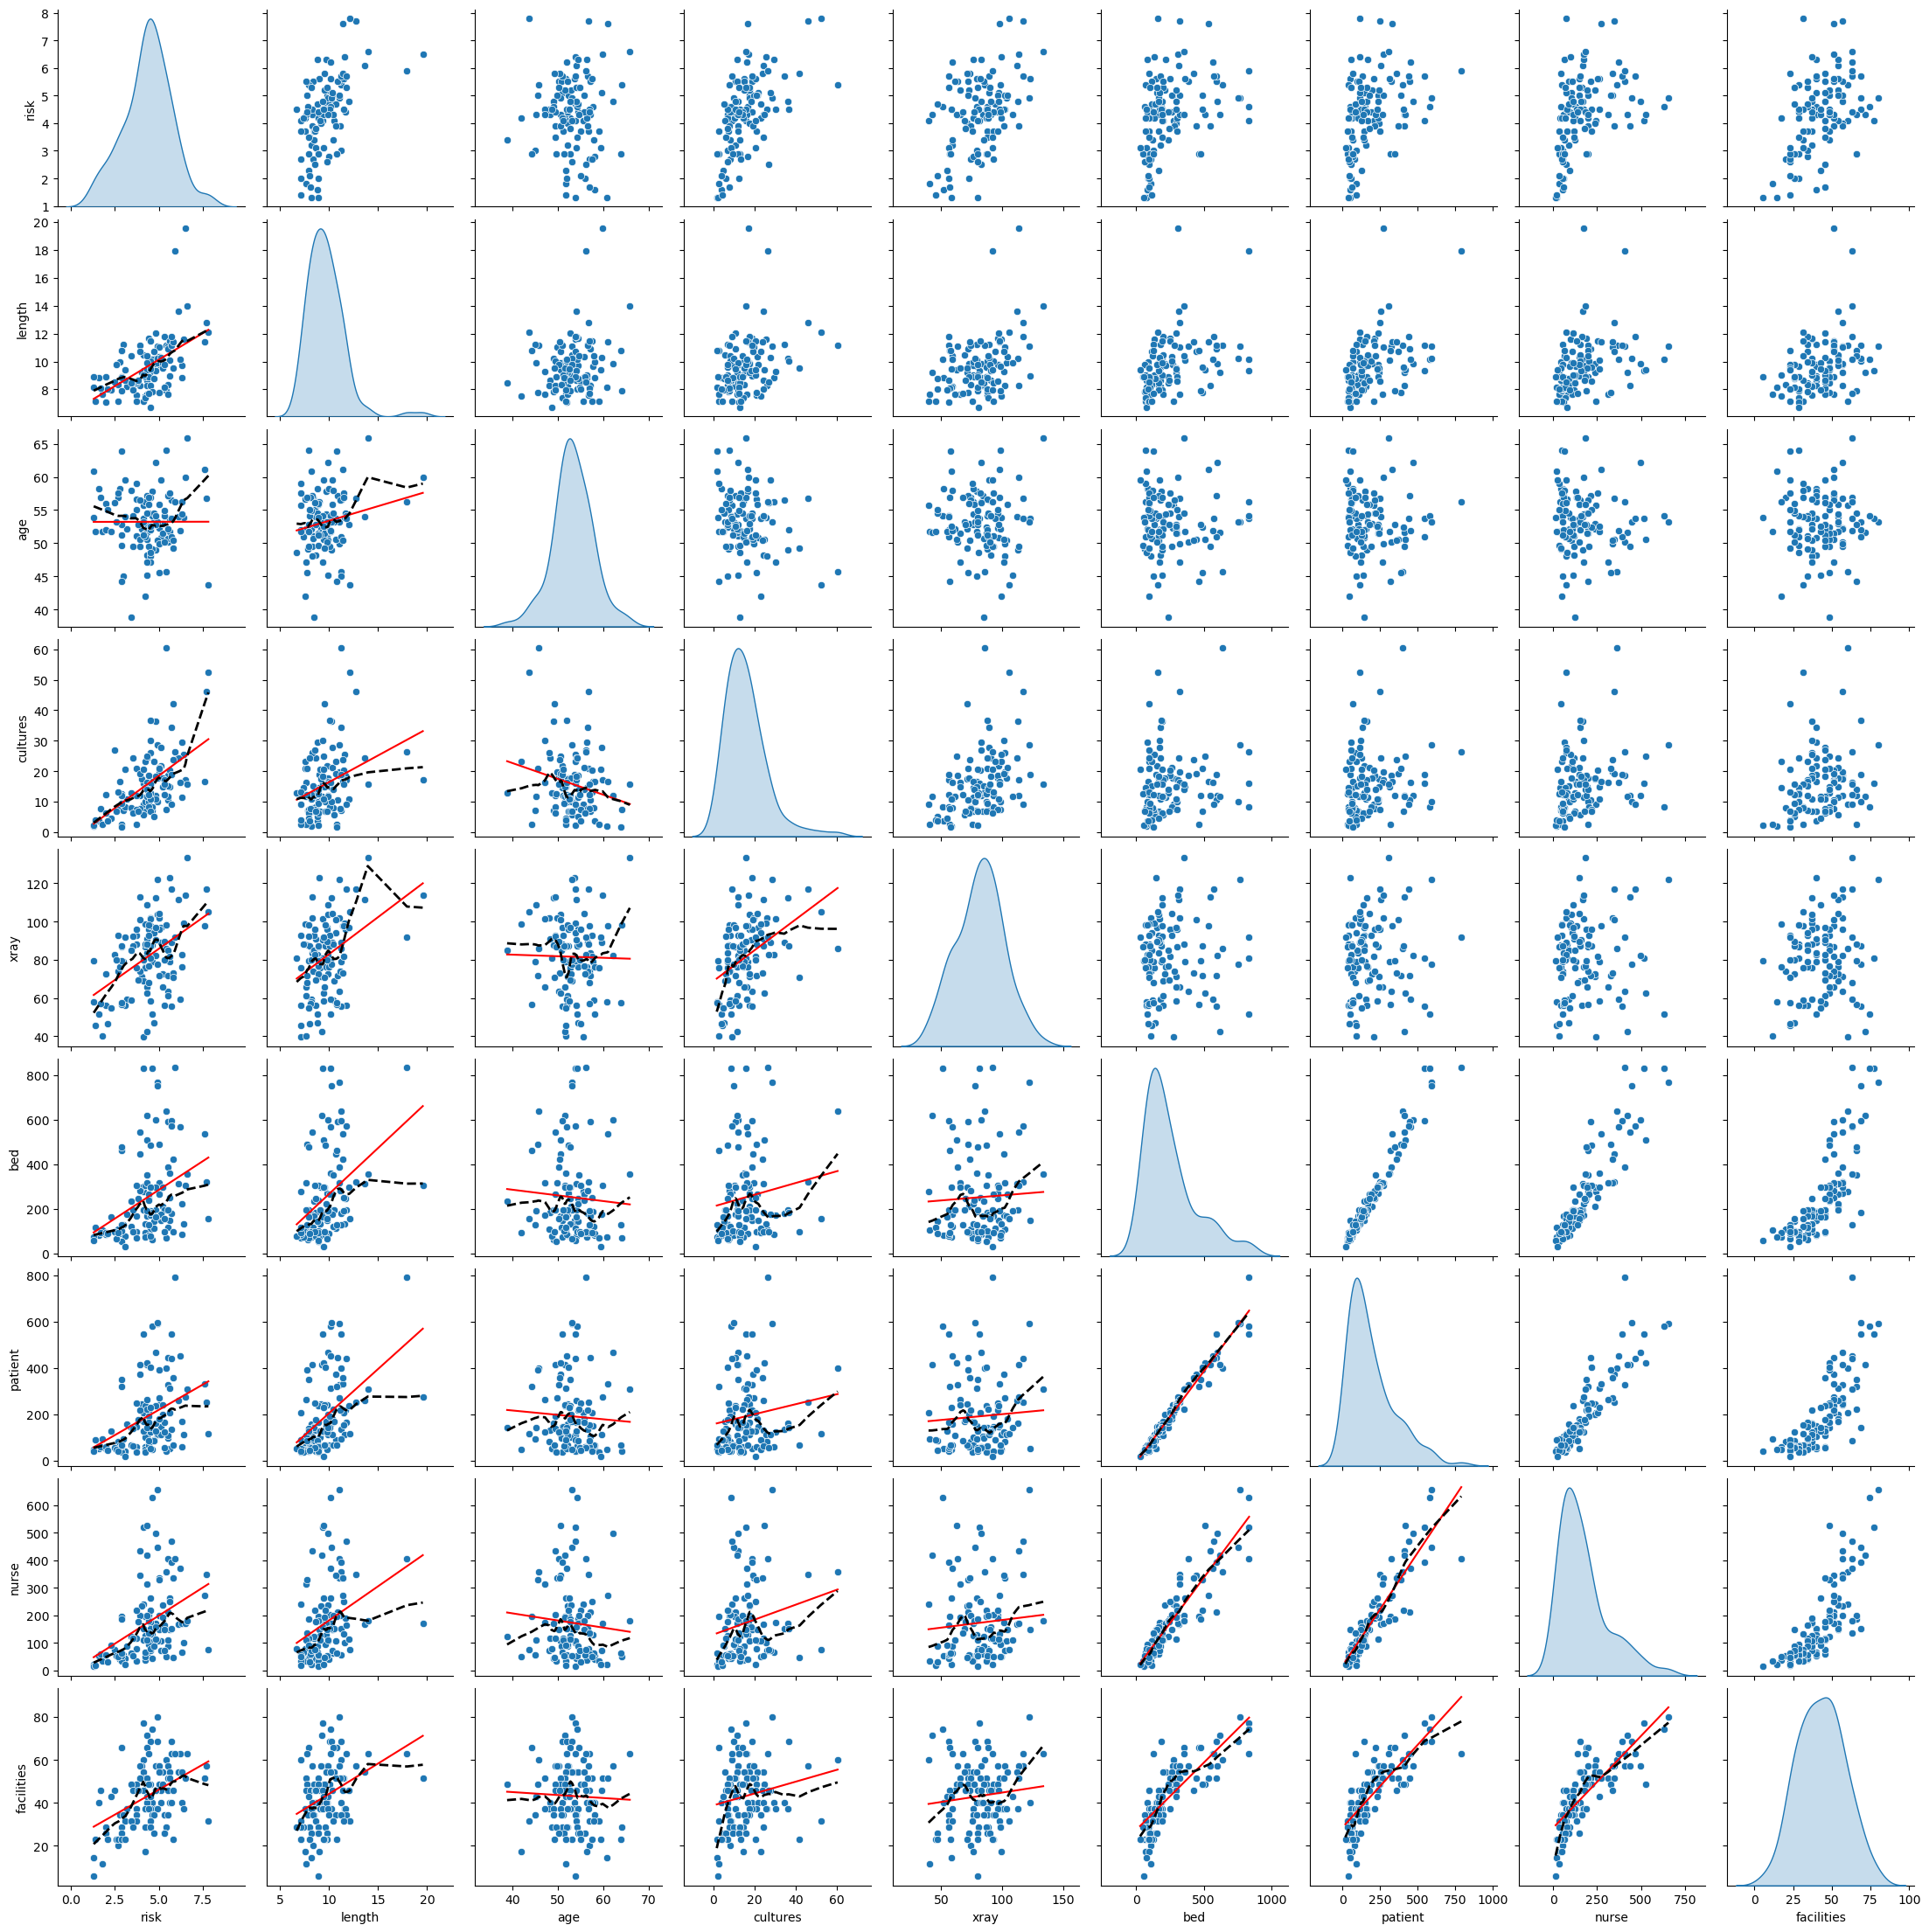

In [19]:
print("\nSummary Statistics:")
display(df.describe())

df.corr(numeric_only=True)

# Correlation Heatmap - Only numeric columns
plt.figure(figsize=(13, 8))
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Function to add LOWESS (Locally Weighted Scatterplot Smoothing) line
def add_lowess_line(x, y, **kwargs):
    ax = plt.gca()
    lowess = sm.nonparametric.lowess(y, x, frac=0.3)  # frac controls smoothness
    ax.plot(lowess[:, 0], lowess[:, 1], color='black', linewidth=2, linestyle='--')

# Create the pairplot
g = sns.pairplot(df, diag_kind='kde')

# Add regression (red) and cluster (blue) lines
def add_reg_and_cluster_line(x, y, **kwargs):
    ax = plt.gca()
    sns.regplot(x=x, y=y, scatter=False, ax=ax, color="red", ci=None, line_kws={"linewidth": 1.5})
    add_lowess_line(x, y)

g.map_lower(add_reg_and_cluster_line)  # Apply both lines to the lower triangle

plt.show()

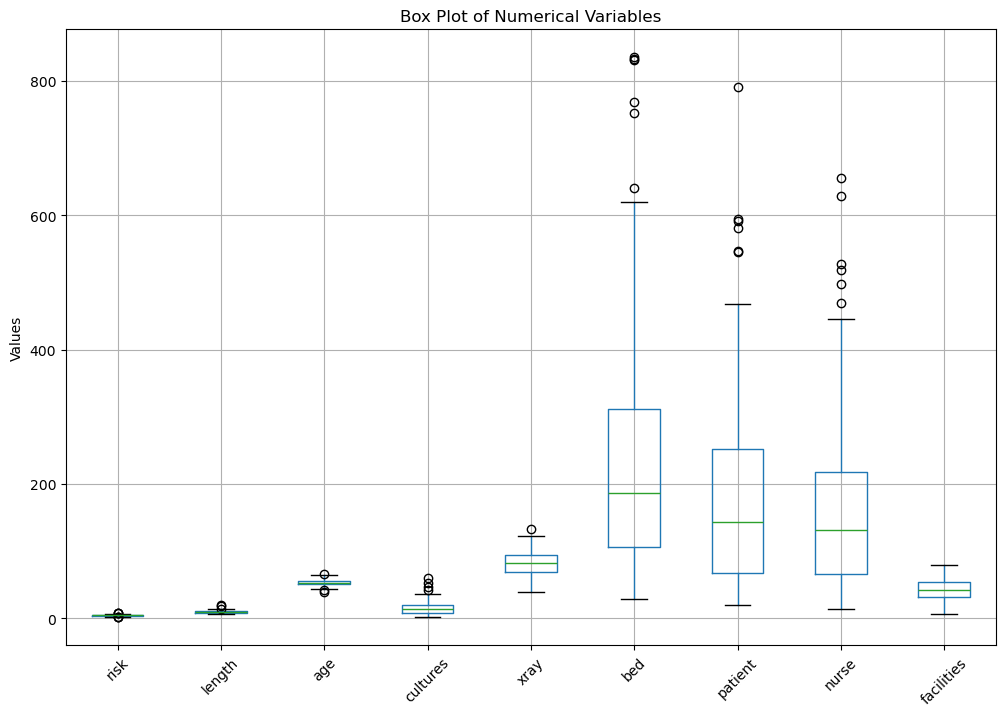

In [9]:
# Selecting only numerical columns for box plot
numeric_columns = df.select_dtypes(include=['number']).columns

# Creating a box plot
plt.figure(figsize=(12, 8))
df[numeric_columns].boxplot(rot=45)  # Rotating x-axis labels for better visibility

# Setting title and labels
plt.title("Box Plot of Numerical Variables")
plt.ylabel("Values")

# Display the plot
plt.show()

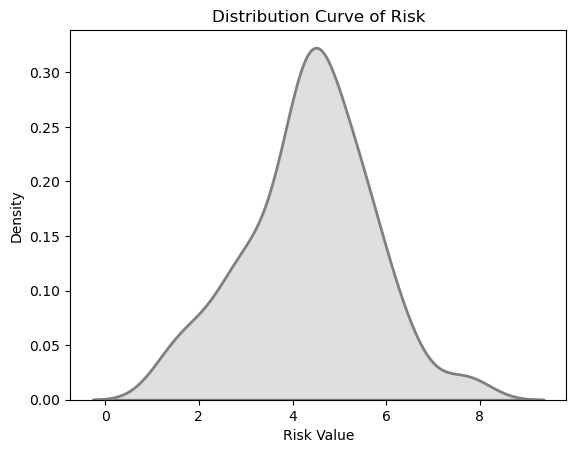

Skewness: -0.11816251698372236
Kurtosis: 0.1217542838807768


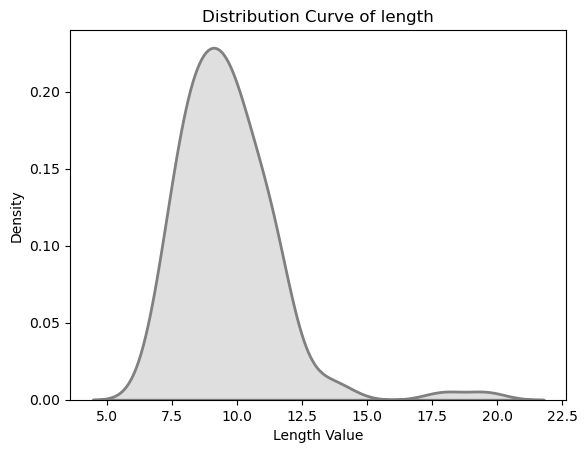

Skewness: 2.041352040387088
Kurtosis: 7.671847676290421


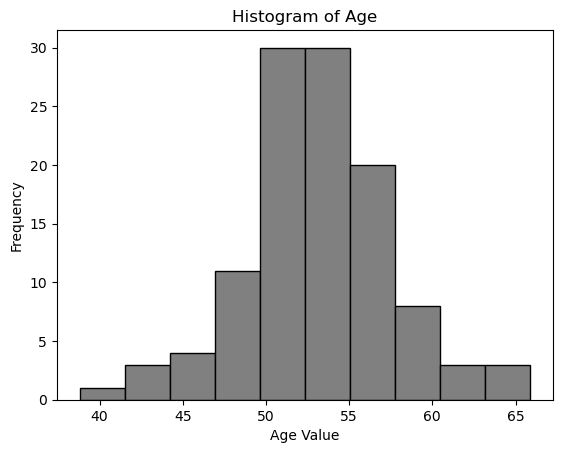

Skewness: -0.10259687054247436
Kurtosis: 0.9671623399309457


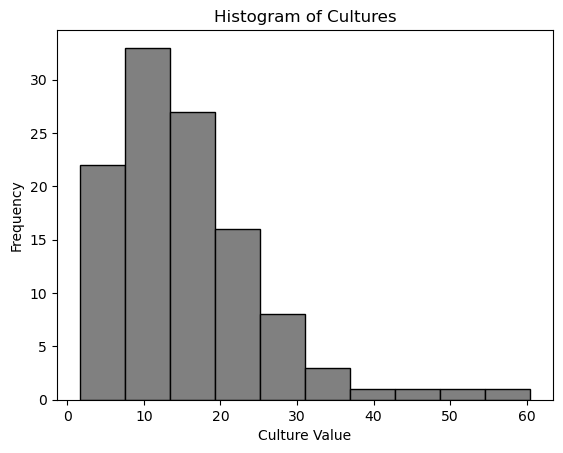

Skewness: 1.588723833480525
Kurtosis: 3.7405544079735584


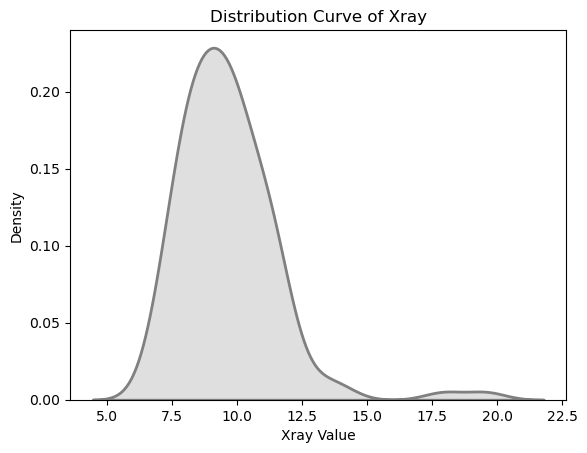

Skewness: 0.007772784732351372
Kurtosis: -0.281250674454816


Skewness: 1.3602481600912324
Kurtosis: 1.1728345570198675


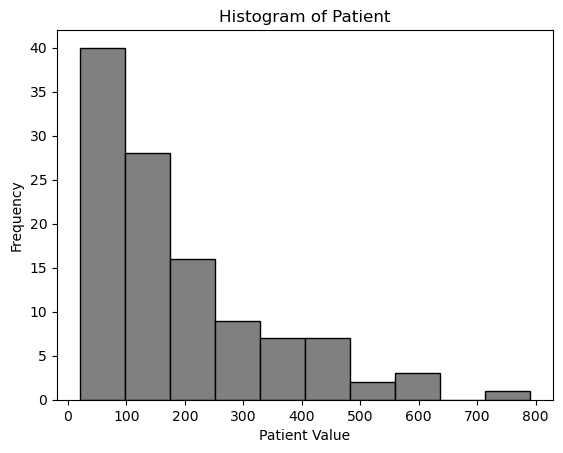

Skewness: 1.3610109790357692
Kurtosis: 1.6021198818029658


Skewness: 1.3604008613028538
Kurtosis: 1.4330299707676186


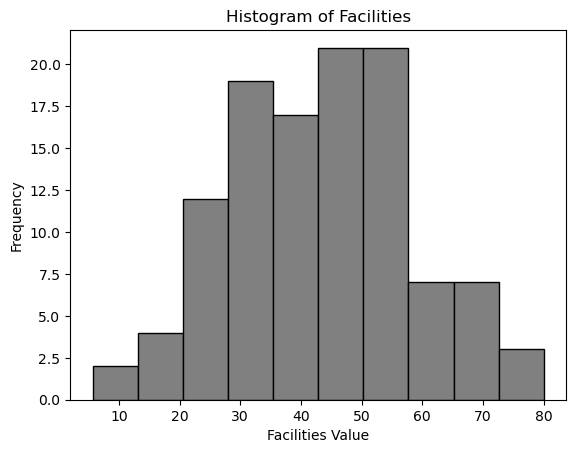

Skewness: 0.07319247360515274
Kurtosis: -0.4526344269900151


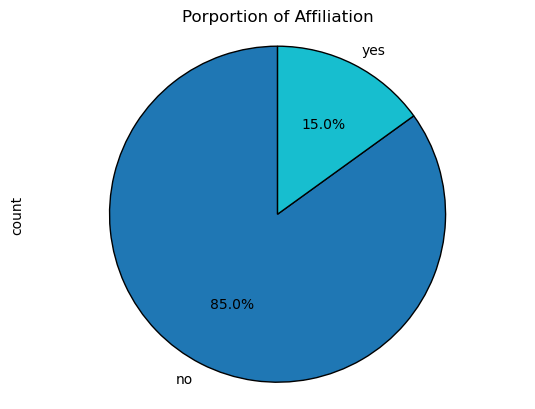

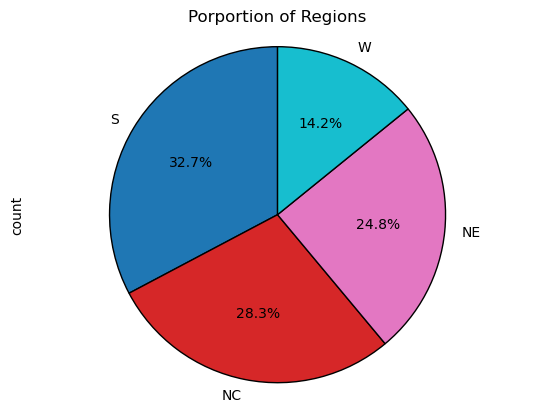

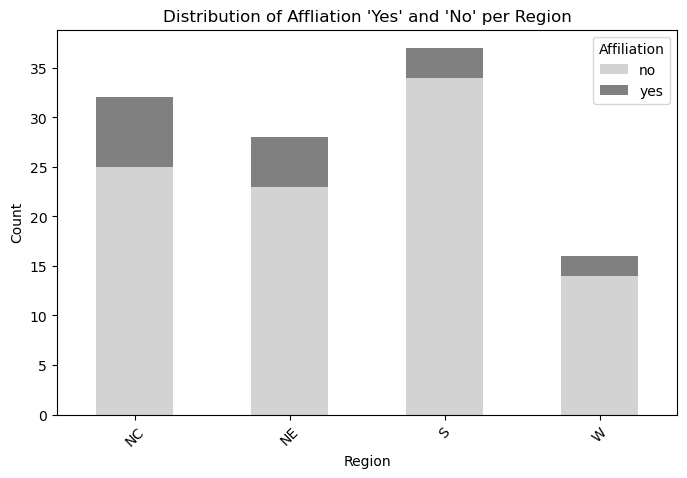

In [11]:
# Plot KDE (distribution curve) for 'risk'
sns.kdeplot(df['risk'], fill=True, color='grey', linewidth=2)
# Add labels and title
plt.xlabel("Risk Value")
plt.ylabel("Density")
plt.title("Distribution Curve of Risk")
# Show the plot
plt.show()
skewness = skew(df['risk']) 
print("Skewness:", skewness)

kurt = kurtosis(df['risk'])
print("Kurtosis:", kurt)

# Plot KDE (distribution curve) for 'length'
sns.kdeplot(df['length'], fill=True, color='grey', linewidth=2)
# Add labels and title
plt.xlabel("Length Value")
plt.ylabel("Density")
plt.title("Distribution Curve of length")

# Show the plot
plt.show()

# Show Skewness
skewness = skew(df['length']) 
print("Skewness:", skewness)

#Show Kurtosis
kurt = kurtosis(df['length'])
print("Kurtosis:", kurt)

df['age'].plot(kind='hist', bins=10, edgecolor='black', color='grey')

plt.xlabel("Age Value")
plt.ylabel("Frequency")
plt.title("Histogram of Age")
plt.show()
skewness = skew(df['age']) 
print("Skewness:", skewness)

#Show Kurtosis
kurt = kurtosis(df['age'])
print("Kurtosis:", kurt)

df['cultures'].plot(kind='hist', bins=10, edgecolor='black', color='grey')

plt.xlabel("Culture Value")
plt.ylabel("Frequency")
plt.title("Histogram of Cultures")
plt.show()

skewness = skew(df['cultures']) 
print("Skewness:", skewness)

#Show Kurtosis
kurt = kurtosis(df['cultures'])
print("Kurtosis:", kurt)

# Plot KDE (distribution curve) for 'xray'
sns.kdeplot(df['length'], fill=True, color='grey', linewidth=2)
# Add labels and title
plt.xlabel("Xray Value")
plt.ylabel("Density")
plt.title("Distribution Curve of Xray")

# Show the plot
plt.show()

skewness = skew(df['xray']) 
print("Skewness:", skewness)

kurt = kurtosis(df['xray'], nan_policy='omit')
print("Kurtosis:", kurt)

df['bed'].plot(kind='hist', bins=10, edgecolor='black', color='grey')

plt.xlabel("Bed Value")
plt.ylabel("Frequency")
plt.title("Histogram of Bed")
plt.show()

skewness = skew(df['bed']) 
print("Skewness:", skewness)

kurt = kurtosis(df['bed'], nan_policy='omit')
print("Kurtosis:", kurt)

df['patient'].plot(kind='hist', bins=10, edgecolor='black', color='grey')

plt.xlabel("Patient Value")
plt.ylabel("Frequency")
plt.title("Histogram of Patient")
plt.show()

skewness = skew(df['patient']) 
print("Skewness:", skewness)

kurt = kurtosis(df['patient'], nan_policy='omit')
print("Kurtosis:", kurt)

df['nurse'].plot(kind='hist', bins=10, edgecolor='black', color='grey')

plt.xlabel("Nurse Value")
plt.ylabel("Frequency")
plt.title("Histogram of Nurse")
plt.show()

skewness = skew(df['nurse']) 
print("Skewness:", skewness)

kurt = kurtosis(df['nurse'], nan_policy='omit')
print("Kurtosis:", kurt)

df['facilities'].plot(kind='hist', bins=10, edgecolor='black', color='grey')

plt.xlabel("Facilities Value")
plt.ylabel("Frequency")
plt.title("Histogram of Facilities")
plt.show()

skewness = skew(df['facilities']) 
print("Skewness:", skewness)

kurt = kurtosis(df['facilities'], nan_policy='omit')
print("Kurtosis:", kurt)

df['affiliation'].value_counts().plot(kind='pie', autopct='%.1f%%', startangle=90, cmap='tab10',wedgeprops={'edgecolor': 'black'})
plt.title("Porportion of Affiliation")
plt.axis('equal')
plt.show()

df['region'].value_counts().plot(kind='pie', autopct='%.1f%%', startangle=90,cmap='tab10',wedgeprops={'edgecolor': 'black'})
plt.title("Porportion of Regions")
plt.axis('equal')
plt.show()

# Count occurrences of 'yes' and 'no' per region
region_counts = df.groupby(["region", "affiliation"]).size().unstack()

# Plot a stacked bar chart
region_counts.plot(kind="bar", stacked=True, figsize=(8, 5), color=["lightgrey", "grey"])

# Labels and title
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Distribution of Affliation 'Yes' and 'No' per Region")
plt.legend(title="Affiliation")
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Train test split 0.75 , 0.25 random state 5291

In [47]:
# Splitting the dataset (75% training, 25% testing)
train_df, test_df = train_test_split(df, test_size=0.25, random_state=5291)
# Display the sizes of each split
print(f"Training Set: {train_df.shape}")
print(f"Test Set: {test_df.shape}")

Training Set: (84, 11)
Test Set: (29, 11)


# Fit MLR model

In [15]:
# Fit the full MLR model.
# Type your code here:
mlr = smf.ols('risk ~ length + age + cultures + xray + bed  + patient + nurse + facilities + affiliation + region', train_df).fit()
print(mlr.summary())
print('\nMSE =', mlr.mse_resid)
print('\nAIC =', mlr.aic)
print('\nBIC =', mlr.bic)
print('\nCONDITION NUMBER =', mlr.condition_number)
print('\nAdjusted R² =', mlr.rsquared_adj)
print('\nR² =', mlr.rsquared)

                            OLS Regression Results                            
Dep. Variable:                   risk   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     10.85
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           7.55e-12
Time:                        22:13:21   Log-Likelihood:                -99.652
No. Observations:                  84   AIC:                             225.3
Df Residuals:                      71   BIC:                             256.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.1424      1

NORMALITY CHECK OF RESIDUALS


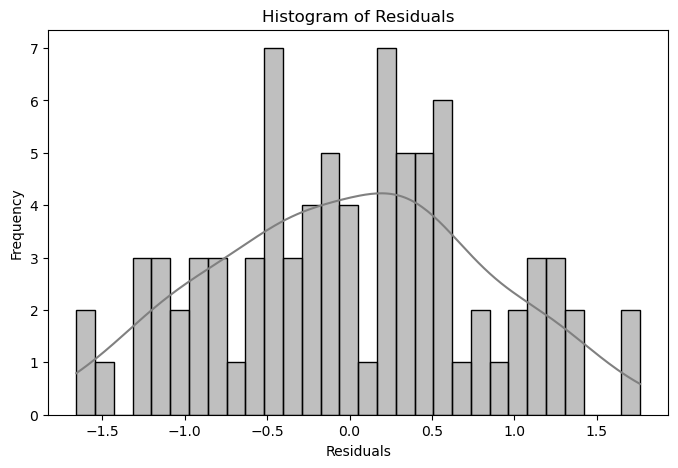

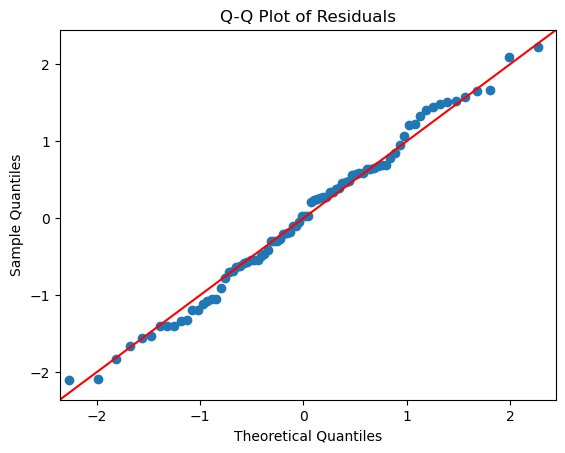


Jarque_bera = (1.4245062841317742, 0.4905377002540259, 0.0038368462347042076, 2.3620792291278594)

Omnibus = NormaltestResult(statistic=2.0815318436544357, pvalue=0.3531840669511357)
Constant Variance (Homoscedasticity)


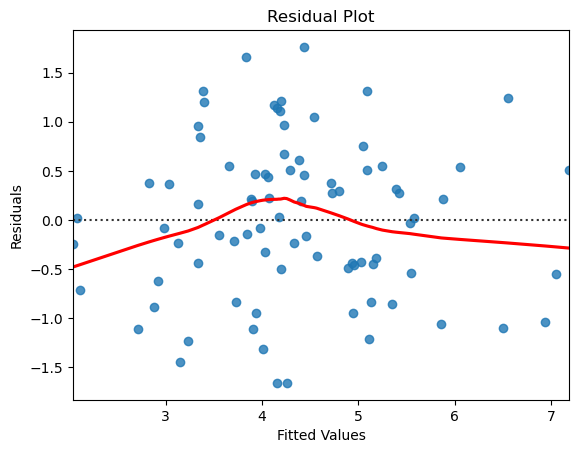


Breushpagen =  (17.54056858221391, 0.1303691395745407, 1.56157967696653, 0.1231660085328887)
Independence check


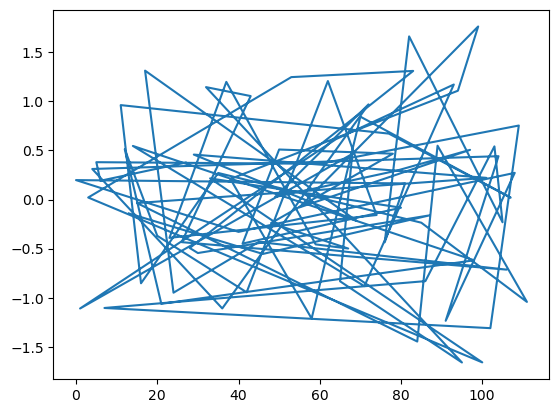


Durbin Watson =  2.235345429323543
Multicolinearity
Intercept 178.9280038819232
affiliation[T.yes] 2.119014783944837
region[T.NE] 2.0234824358087495
region[T.S] 1.9077985264937107
region[T.W] 1.5410726099435827
length 2.545611715793667
age 1.265624464430535
cultures 1.6188095304883192
xray 1.5639853916811752
bed 47.0708848913553
patient 43.4624110789282
nurse 6.321661820417416
facilities 3.3159629523983085


In [17]:
res = mlr.resid
print("\033[1;4m\033[1m\033[36mNORMALITY CHECK OF RESIDUALS\033[0m")

# Plot histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(res, bins=30, kde=True, color="grey")
# Labels and title
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
# Show the plot
plt.show()

# Create a Q-Q plot
sm.qqplot(mlr.resid, line='45', fit=True)
# Add labels & title
plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
# Show the plot
plt.show()

# JB test
x = sm.stats.jarque_bera(res)
print('\nJarque_bera =',x)
# omnibus test
y = sm.stats.omni_normtest(res)
print('\nOmnibus =',y)
print("\033[1;4m\033[1m\033[36mConstant Variance (Homoscedasticity)\033[0m")
# Residual plot
sns.residplot(x=mlr.fittedvalues, y=res, lowess=True, line_kws={'color': 'red'})
# Labels and title
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")

# Show the plot
plt.show()
# Perform the Breusch-Pagan test on residuals.
print('\nBreushpagen = ', sm.stats.het_breuschpagan(res, mlr.model.exog))
print("\033[1;4m\033[1m\033[36mIndependence check\033[0m")
plt.plot(res)
plt.show()
print('\nDurbin Watson = ', sm.stats.durbin_watson(res))
print("\033[1;4m\033[1m\033[36mMulticolinearity\033[0m")
for i in range(13):
    predictor = mlr.model.exog_names[i]
    Vif = vif(mlr.model.exog,i)
    print(predictor, Vif)


In [53]:
mlr.get_prediction(test_df).summary_frame()

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0   4.979534  0.575216       3.832586       6.126482      2.913265   
1   4.094793  0.271001       3.554432       4.635154      2.293136   
2   4.749770  0.397765       3.956650       5.542890      2.856884   
3   2.568066  0.437178       1.696358       3.439773      0.640930   
4   4.875390  0.666258       3.546909       6.203871      2.703101   
5   4.506244  0.467957       3.573165       5.439323      2.550582   
6   6.668612  0.500955       5.669736       7.667487      4.680716   
7   3.949346  0.301394       3.348383       4.550308      2.128595   
8   4.479963  0.468089       3.546619       5.413306      2.524174   
9   3.159883  0.257973       2.645499       3.674267      1.365846   
10  3.582623  0.239456       3.105161       4.060086      1.798822   
11  3.768101  0.519211       2.732823       4.803379      1.761667   
12  3.354425  0.304973       2.746327       3.962524      1.531307   
13  4.314931  0.304984       3.706811       4.923052      2.491806   
14  2.579019  0.304219       1.972424       3.185614      0.756402   
15  4.183030  0.269016       3.646628       4.719432      2.382557   
16  3.453191  0.247967       2.958760       3.947622      1.664773   
17  5.221022  0.592207       4.040196       6.401849      3.135758   
18  3.708796  0.239822       3.230604       4.186988      1.924799   
19  3.600132  0.193908       3.213490       3.986773      1.838465   
20  4.291708  0.234978       3.823176       4.760240      2.510276   
21  4.320418  0.466160       3.390921       5.249915      2.366462   
22  4.948751  0.422087       4.107133       5.790369      3.035038   
23  4.357646  0.287282       3.784823       4.930470      2.545988   
24  3.962868  0.285251       3.394094       4.531641      2.152486   
25  4.608997  0.230231       4.149929       5.068065      2.830031   
26  3.759089  0.496042       2.770009       4.748169      1.776097   
27  2.418732  0.340171       1.740449       3.097014      0.571018   
28  4.806415  0.503924       3.801619       5.811211      2.815538   

    obs_ci_upper  
0       7.045802  
1       5.896450  
2       6.642656  
3       4.495201  
4       7.047679  
5       6.461906  
6       8.656507  
7       5.770096  
8       6.435751  
9       4.953920  
10      5.366425  
11      5.774535  
12      5.177544  
13      6.138057  
14      4.401637  
15      5.983503  
16      5.241609  
17      7.306287  
18      5.492793  
19      5.361798  
20      6.073140  
21      6.274373  
22      6.862464  
23      6.169304  
24      5.773249  
25      6.387963  
26      5.742080  
27      4.266445  
28      6.797292

In [19]:
test_df['predicted_risk'] = mlr.predict(test_df)

In [21]:
test_r2 = mlr.rsquared
print('\n Test R² =',test_r2)
adjusted_r2 = mlr.rsquared_adj
print('\n  Adjusted R² =',adjusted_r2)
mspe = mean_squared_error(test_df['risk'], test_df['predicted_risk']) 
print('\n MSPE =',mspe)


 Test R² = 0.6470585105259865

  Adjusted R² = 0.5874064277979842

 MSPE = 1.229442051088816


# Mean Centering

In [45]:
train_df1 = train_df
test_df1 = test_df

In [43]:
train_df1['length0'] = train_df1.length - np.mean(train_df1.length)
train_df1['age0'] = train_df1.age - np.mean(train_df1.age)
train_df1['cultures0'] = train_df1.cultures - np.mean(train_df1.cultures)
train_df1['xray0'] = train_df1.xray - np.mean(train_df1.xray)
train_df1['bed0'] = train_df1.bed - np.mean(train_df1.bed)
train_df1['patient0'] = train_df1.patient - np.mean(train_df1.patient)
train_df1['nurse0'] = train_df1.nurse - np.mean(train_df1.nurse)
train_df1['facilities0'] = train_df1.nurse - np.mean(train_df1.nurse)
train_df1.head()

risk  length   age  cultures  xray  bed  patient  nurse  facilities  \
27    3.2    8.19  52.1      10.8  59.2  176      156     88        37.1   
6     4.6    9.68  57.8      16.7  79.0  186      151    129        40.0   
5     5.1    9.76  50.9      21.9  97.0  150      147    106        40.0   
60    3.4   10.42  58.0       8.0  59.0  119       67     64        31.4   
109   5.8    9.50  49.3      42.0  70.9   98       68     46        22.9   

    affiliation region   length0      age0  cultures0      xray0    bed0  \
27           no     NE -1.634762 -1.013095  -5.545238 -22.764286  -71.75   
6            no      S -0.144762  4.686905   0.354762  -2.964286  -61.75   
5            no     NC -0.064762 -2.213095   5.554762  15.035714  -97.75   
60           no     NE  0.595238  4.886905  -8.345238 -22.964286 -128.75   
109          no      S -0.324762 -3.813095  25.654762 -11.064286 -149.75   

       patient0      nurse0  facilities0  
27   -33.309524  -79.964286   -79.964286  
6    -38.309524  -38.964286   -38.964286  
5    -42.309524  -61.964286   -61.964286  
60  -122.309524 -103.964286  -103.964286  
109 -121.309524 -121.964286  -121.964286

In [29]:
# Fit the full MLR model.
# Type your code here:
mlr1 = smf.ols('risk ~ length0 + age0 + cultures0 + xray0 + bed0  + patient0 + nurse0 + facilities0 + affiliation + region', train_df1).fit()
print(mlr1.summary())
print('\nMSE =', mlr1.mse_resid)
print('\nAIC =', mlr1.aic)
print('\nBIC =', mlr1.bic)
print('\nCONDITION NUMBER =', mlr1.condition_number)
print('\nAdjusted R² =', mlr1.rsquared_adj)
print('\nR² =', mlr1.rsquared)

                            OLS Regression Results                            
Dep. Variable:                   risk   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     11.76
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           3.28e-12
Time:                        22:13:50   Log-Likelihood:                -100.21
No. Observations:                  84   AIC:                             224.4
Df Residuals:                      72   BIC:                             253.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.2601      0

NORMALITY CHECK OF RESIDUALS


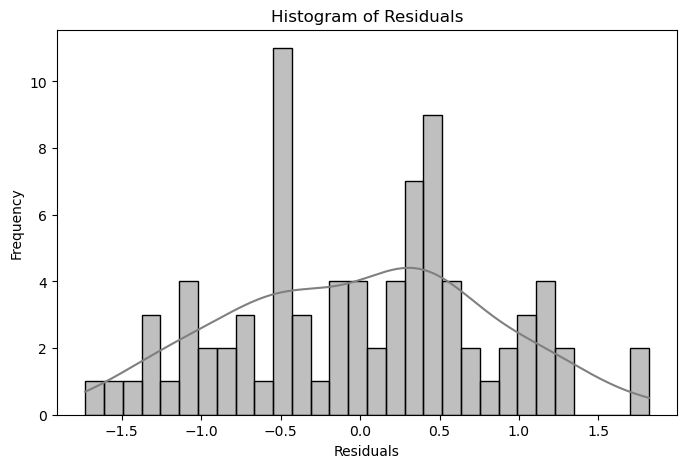

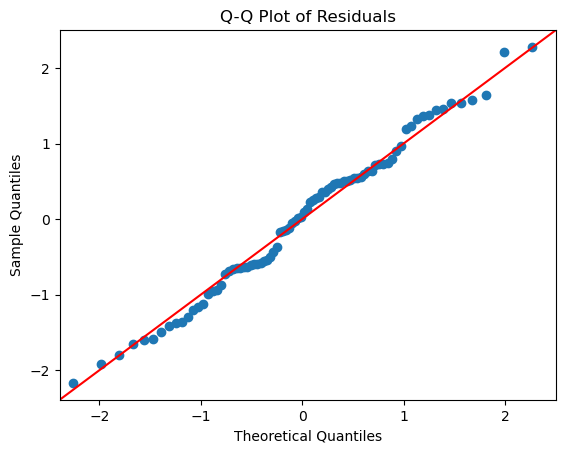


Jarque_bera = (1.3781467044321558, 0.502041068831151, 0.005941232493097673, 2.3726125532876976)

Omnibus = NormaltestResult(statistic=1.9657328957325937, pvalue=0.37423682955692605)
Constant Variance (Homoscedasticity)


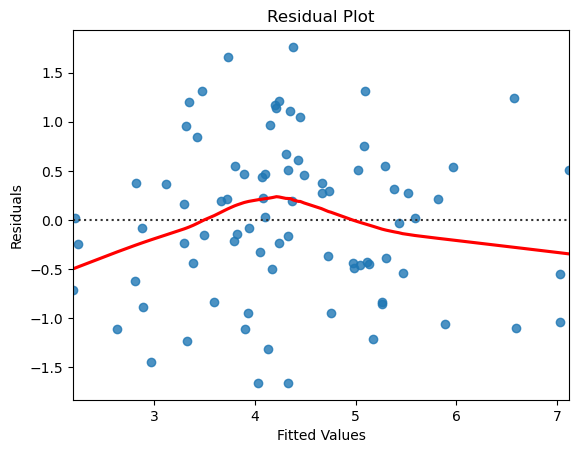


Breushpagen =  (17.12497483529224, 0.14495634539837499, 1.6761226496795762, 0.0963916595435576)
Independence check


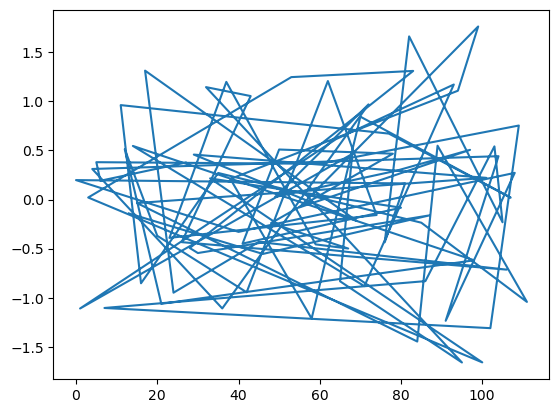


Durbin Watson =  2.259071296375148
Multicolinearity
Intercept 5.2152981758732
affiliation[T.yes] 2.1185902433071955
region[T.NE] 2.0200140842884546
region[T.S] 1.8702440334645345
region[T.W] 1.4899988744079322
length0 2.545469315086026
age0 1.2581460859017988
cultures0 1.5705358385031571
xray0 1.510079195344279
bed0 40.927281232515504
patient0 41.63814959576447
nurse0 inf
facilities0 inf


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [31]:
res1 = mlr1.resid
print("\033[1;4m\033[1m\033[36mNORMALITY CHECK OF RESIDUALS\033[0m")

# Plot histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(res1, bins=30, kde=True, color="grey")
# Labels and title
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
# Show the plot
plt.show()

# Create a Q-Q plot
sm.qqplot(mlr1.resid, line='45', fit=True)
# Add labels & title
plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
# Show the plot
plt.show()

# JB test
x = sm.stats.jarque_bera(res1)
print('\nJarque_bera =',x)
# omnibus test
y = sm.stats.omni_normtest(res1)
print('\nOmnibus =',y)
print("\033[1;4m\033[1m\033[36mConstant Variance (Homoscedasticity)\033[0m")
# Residual plot
sns.residplot(x=mlr1.fittedvalues, y=res, lowess=True, line_kws={'color': 'red'})
# Labels and title
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")

# Show the plot
plt.show()
# Perform the Breusch-Pagan test on residuals.
print('\nBreushpagen = ', sm.stats.het_breuschpagan(res1, mlr1.model.exog))
print("\033[1;4m\033[1m\033[36mIndependence check\033[0m")
plt.plot(res)
plt.show()
print('\nDurbin Watson = ', sm.stats.durbin_watson(res1))
print("\033[1;4m\033[1m\033[36mMulticolinearity\033[0m")
for i in range(13):
    predictor = mlr1.model.exog_names[i]
    Vif = vif(mlr1.model.exog,i)
    print(predictor, Vif)


In [33]:
test_df1['length0'] = test_df1.length - np.mean(test_df1.length)
test_df1['age0'] = test_df1.age - np.mean(test_df1.age)
test_df1['cultures0'] = test_df1.cultures - np.mean(test_df1.cultures)
test_df1['xray0'] = test_df1.xray - np.mean(test_df1.xray)
test_df1['bed0'] = test_df1.bed - np.mean(test_df1.bed)
test_df1['patient0'] = test_df1.patient - np.mean(test_df1.patient)
test_df1['nurse0'] = test_df1.nurse - np.mean(test_df1.nurse)
test_df1['facilities0'] = test_df1.nurse - np.mean(test_df1.nurse)
test_df1.head()

risk  length   age  cultures  xray  bed  patient  nurse  facilities  \
52   7.6   11.41  61.1      16.6  97.9  535      330    273        51.4   
34   6.3    9.74  54.4      11.4  76.1  221      170    172        54.3   
31   5.2    9.84  53.0      17.7  72.6  210      200    239        54.3   
92   1.3    8.92  53.9       2.2  79.5   56       40     14         5.7   
19   4.1    9.35  53.8      15.9  80.9  833      547    519        77.1   

   affiliation region  predicted_risk   length0      age0  cultures0  \
52          no      S        4.979534  2.272759  7.524138   2.406897   
34          no     NC        4.094793  0.602759  0.824138  -2.793103   
31          no     NC        4.749770  0.702759 -0.575862   3.506897   
92          no     NC        2.568066 -0.217241  0.324138 -11.993103   
19          no      S        4.875390  0.212759  0.224138   1.706897   

        xray0        bed0    patient0      nurse0  facilities0  
52  17.244828  270.034483  132.655172   84.448276    84.448276  
34  -4.555172  -43.965517  -27.344828  -16.551724   -16.551724  
31  -8.055172  -54.965517    2.655172   50.448276    50.448276  
92  -1.155172 -208.965517 -157.344828 -174.551724  -174.551724  
19   0.244828  568.034483  349.655172  330.448276   330.448276

In [35]:
test_df1['predicted_risk'] = mlr1.predict(test_df1)
print(mlr1.get_prediction(test_df1).summary_frame())
test_r21 = mlr1.rsquared
print('\n Test R² =',test_r21)
adjusted_r21 = mlr1.rsquared_adj
print('\n  Adjusted R² =',adjusted_r21)
mspe1 = mean_squared_error(test_df1['risk'], test_df1['predicted_risk']) 
print('\n MSPE =',mspe1)

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0   5.386925  0.538630       4.313184       6.460665      3.361313   
1   4.189501  0.235095       3.720848       4.658153      2.409102   
2   4.802389  0.361198       4.082355       5.522424      2.939962   
3   3.137508  0.270649       2.597980       3.677037      1.337154   
4   5.192733  0.640077       3.916763       6.468703      3.053041   
5   4.376169  0.282604       3.812809       4.939530      2.568530   
6   6.935769  0.468795       6.001243       7.870296      4.980386   
7   4.182858  0.305465       3.573925       4.791791      2.360501   
8   4.844524  0.417387       4.012478       5.676570      2.935995   
9   3.544638  0.204206       3.137560       3.951715      1.779448   
10  3.905575  0.228922       3.449228       4.361923      2.128376   
11  4.152312  0.496205       3.163145       5.141478      2.170234   
12  3.579976  0.298552       2.984823       4.175129      1.762178   
13  4.467727  0.2879

# PCA

In [49]:
train_df2 = train_df
test_df2 = test_df

In [51]:
sclr = preprocessing.StandardScaler()
sclr.fit(train_df2[['bed','patient','nurse', 'facilities']])
print('Mean:', sclr.mean_)
print('SD:', sclr.scale_)

Mean: [247.75       189.30952381 167.96428571  42.51666667]
SD: [177.1303579  146.62772558 130.26341869  13.64835446]


In [53]:
ztrain_df2 = train_df2.copy()
ztrain_df2[['bed','patient','nurse', 'facilities']] = sclr.transform(train_df2[['bed','patient','nurse','facilities']])
ztrain_df2.head()

risk  length   age  cultures  xray       bed   patient     nurse  \
27    3.2    8.19  52.1      10.8  59.2 -0.405069 -0.227171 -0.613866   
6     4.6    9.68  57.8      16.7  79.0 -0.348613 -0.261271 -0.299119   
5     5.1    9.76  50.9      21.9  97.0 -0.551853 -0.288551 -0.475684   
60    3.4   10.42  58.0       8.0  59.0 -0.726866 -0.834150 -0.798108   
109   5.8    9.50  49.3      42.0  70.9 -0.845423 -0.827330 -0.936290   

     facilities affiliation region  
27    -0.396873          no     NE  
6     -0.184393          no      S  
5     -0.184393          no     NC  
60    -0.814506          no     NE  
109   -1.437292          no      S

In [73]:
ztest_df2 = test_df2.copy()
ztest_df2[['bed','patient','nurse', 'facilities']] = sclr.transform(test_df2[['bed','patient','nurse', 'facilities']])
ztest_df2.head()

risk  length   age  cultures  xray       bed   patient     nurse  \
52   7.6   11.41  61.1      16.6  97.9  1.621687  0.959508  0.806333   
34   6.3    9.74  54.4      11.4  76.1 -0.151019 -0.131691  0.030981   
31   5.2    9.84  53.0      17.7  72.6 -0.213120  0.072909  0.545324   
92   1.3    8.92  53.9       2.2  79.5 -1.082536 -1.018290 -1.181946   
19   4.1    9.35  53.8      15.9  80.9  3.304064  2.439446  2.694814   

    facilities affiliation region  
52    0.650872          no      S  
34    0.863352          no     NC  
31    0.863352          no     NC  
92   -2.697517          no     NC  
19    2.533883          no      S

In [75]:
# Create a PCA object (i.e. variables to PCs) with 3 components.
# Fit on training data, but selected columns (Income, Limit, and Rating).
pca4 = PCA(n_components=4)
pca4.fit(ztrain_df2[['bed','patient','nurse','facilities']])
print('Variance explained:', pca4.explained_variance_)
print('Proportion of total variance:', pca4.explained_variance_ratio_)
print('Principal components are:\n', pca4.components_)
# Which PC(s) would you retain?

Variance explained: [3.60398138 0.30018995 0.12750217 0.01651927]
Proportion of total variance: [0.89026921 0.07415407 0.03149607 0.00408065]
Principal components are:
 [[ 0.51971744  0.51412966  0.49973099  0.46457874]
 [-0.20884203 -0.28487549 -0.31023804  0.88260032]
 [-0.35720367 -0.46731206  0.80726832  0.04840294]
 [ 0.74745189 -0.660406   -0.04836492 -0.05329564]]


In [95]:
newX = pca4.transform(ztrain_df2[['bed','patient','nurse','facilities']])
ztrain_df2['pc1'] = newX[:,0]
ztrain_df2['pc2'] = newX[:,1]
ztrain_df2['pc3'] = newX[:,2]
ztrain_df2['pc4'] = newX[:,3]
ztrain_df2.head()

risk  length   age  cultures  xray       bed   patient     nurse  \
27    3.2    8.19  52.1      10.8  59.2 -0.405069 -0.227171 -0.613866   
6     4.6    9.68  57.8      16.7  79.0 -0.348613 -0.261271 -0.299119   
5     5.1    9.76  50.9      21.9  97.0 -0.551853 -0.288551 -0.475684   
60    3.4   10.42  58.0       8.0  59.0 -0.726866 -0.834150 -0.798108   
109   5.8    9.50  49.3      42.0  70.9 -0.845423 -0.827330 -0.936290   

     facilities affiliation region       pc1       pc2       pc3       pc4  
27    -0.396873          no     NE -0.818463 -0.010525 -0.263913 -0.101903  
6     -0.184393          no      S -0.550652  0.077287 -0.003774 -0.063733  
5     -0.184393          no     NC -0.758540  0.182281 -0.060963 -0.189090  
60    -0.814506          no     NE -1.583868 -0.081851 -0.034264  0.089591  
109   -1.437292          no      S -2.000364 -0.565836 -0.136797  0.036346

In [97]:
newX = pca4.transform(ztest_df2[['bed','patient','nurse','facilities']])
ztest_df2['pc1'] = newX[:,0]
ztest_df2['pc2'] = newX[:,1]
ztest_df2['pc3'] = newX[:,2]
ztest_df2['pc4'] = newX[:,3]
ztest_df2.head()

risk  length   age  cultures  xray       bed   patient     nurse  \
52   7.6   11.41  61.1      16.6  97.9  1.621687  0.959508  0.806333   
34   6.3    9.74  54.4      11.4  76.1 -0.151019 -0.131691  0.030981   
31   5.2    9.84  53.0      17.7  72.6 -0.213120  0.072909  0.545324   
92   1.3    8.92  53.9       2.2  79.5 -1.082536 -1.018290 -1.181946   
19   4.1    9.35  53.8      15.9  80.9  3.304064  2.439446  2.694814   

    facilities affiliation region       pc1       pc2       pc3       pc4  
52    0.650872          no      S  2.041462 -0.287712 -0.345231  0.504781  
34    0.863352          no     NC  0.270384  0.821438  0.182284 -0.073421  
31    0.863352          no     NC  0.600333  0.616553  0.524067 -0.279834  
92   -2.697517          no     NC -2.930010 -1.497980 -0.222170  0.064272  
19    2.533883          no      S  5.495242  0.015406 -0.022121  0.593224

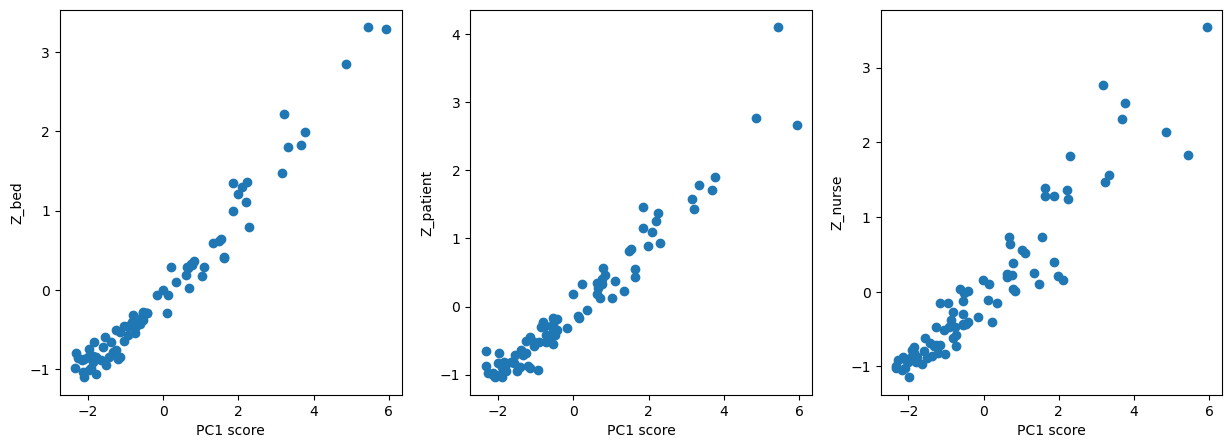

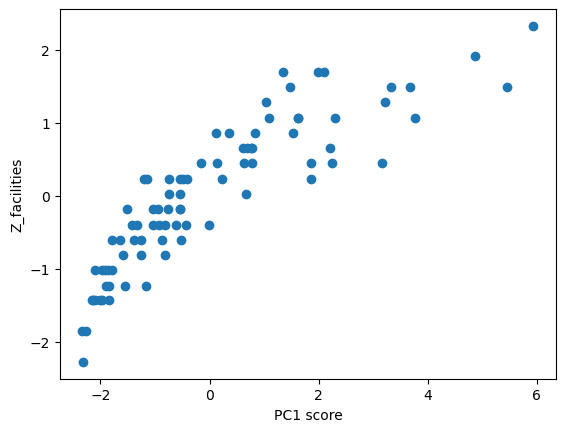

In [99]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(131)
plt.scatter(ztrain_df2.pc1, ztrain_df2.bed)
plt.xlabel('PC1 score')
plt.ylabel('Z_bed')

ax = fig.add_subplot(132) 
plt.scatter(ztrain_df2.pc1, ztrain_df2.patient)
plt.xlabel('PC1 score')
plt.ylabel('Z_patient')

ax = fig.add_subplot(133)
plt.scatter(ztrain_df2.pc1, ztrain_df2.nurse)
plt.xlabel('PC1 score')
plt.ylabel('Z_nurse');
plt.show()

ax = fig.add_subplot(133)
plt.scatter(ztrain_df2.pc1, ztrain_df2.facilities)
plt.xlabel('PC1 score')
plt.ylabel('Z_facilities');
plt.show()

In [101]:
# Fit the full MLR model.
# Type your code here:
mlr2 = smf.ols('risk ~ length + age + cultures + xray + pc1 + affiliation + region', ztrain_df2).fit()
print(mlr2.summary())
print('\nMSE =', mlr2.mse_resid)
print('\nAIC =', mlr2.aic)
print('\nBIC =', mlr2.bic)
print('\nCONDITION NUMBER =', mlr2.condition_number)
print('\nAdjusted R² =', mlr2.rsquared_adj)
print('\nR² =', mlr2.rsquared)

                            OLS Regression Results                            
Dep. Variable:                   risk   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     13.94
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           7.89e-13
Time:                        22:25:44   Log-Likelihood:                -101.74
No. Observations:                  84   AIC:                             223.5
Df Residuals:                      74   BIC:                             247.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.6113      1

NORMALITY CHECK OF RESIDUALS


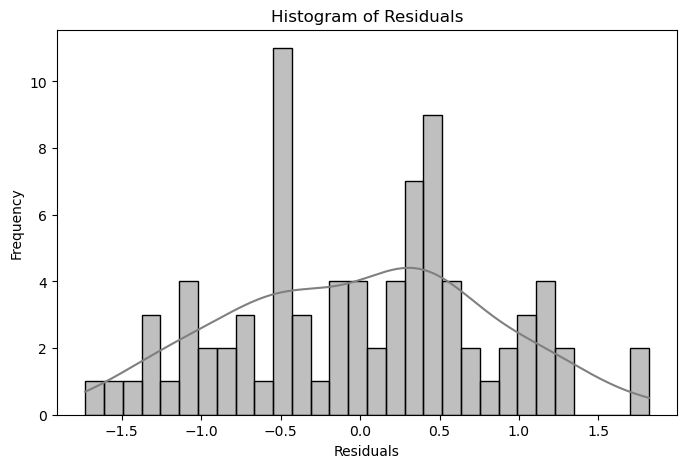

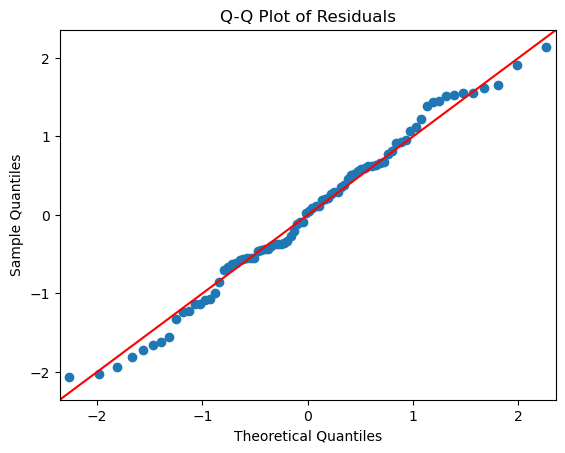


Jarque_bera = (1.4349990932401124, 0.4879708802052083, -0.05322008648403946, 2.368596618235005)

Omnibus = NormaltestResult(statistic=2.0546193464455365, pvalue=0.35796871909709593)
Constant Variance (Homoscedasticity)


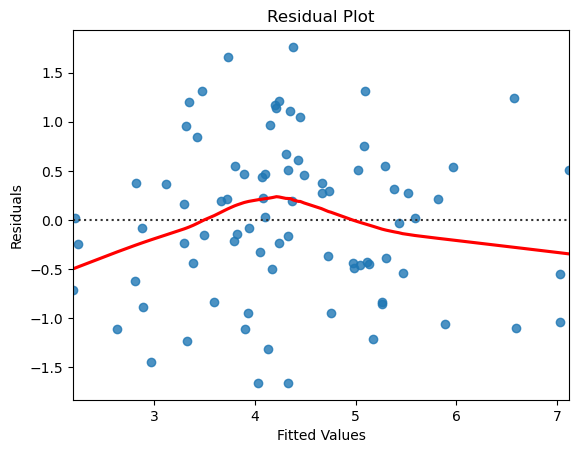


Breushpagen =  (17.29545612426743, 0.04428525452994697, 2.1318950018359493, 0.03705031443667179)
Independence check


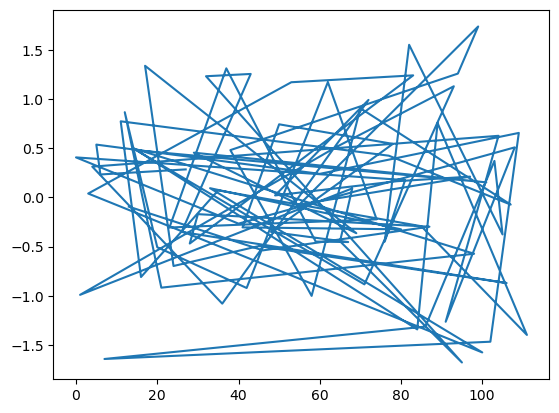


Durbin Watson =  2.20030517974796
Multicolinearity
Intercept 170.7353230160422
affiliation[T.yes] 2.080543044809765
region[T.NE] 1.8926633447811176
region[T.S] 1.7271596557082705
region[T.W] 1.4734167497251442
length 2.1358531654807162
age 1.2357525335813904
cultures 1.4558155442904175
xray 1.4990221726940973
pc1 2.0538305682646336


In [103]:
res2 = mlr2.resid
print("\033[1;4m\033[1m\033[36mNORMALITY CHECK OF RESIDUALS\033[0m")

# Plot histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(res1, bins=30, kde=True, color="grey")
# Labels and title
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
# Show the plot
plt.show()

# Create a Q-Q plot
sm.qqplot(mlr2.resid, line='45', fit=True)
# Add labels & title
plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
# Show the plot
plt.show()

# JB test
x = sm.stats.jarque_bera(res2)
print('\nJarque_bera =',x)
# omnibus test
y = sm.stats.omni_normtest(res2)
print('\nOmnibus =',y)
print("\033[1;4m\033[1m\033[36mConstant Variance (Homoscedasticity)\033[0m")
# Residual plot
sns.residplot(x=mlr1.fittedvalues, y=res, lowess=True, line_kws={'color': 'red'})
# Labels and title
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")

# Show the plot
plt.show()
# Perform the Breusch-Pagan test on residuals.
print('\nBreushpagen = ', sm.stats.het_breuschpagan(res2, mlr2.model.exog))
print("\033[1;4m\033[1m\033[36mIndependence check\033[0m")
plt.plot(res2)
plt.show()
print('\nDurbin Watson = ', sm.stats.durbin_watson(res2))
print("\033[1;4m\033[1m\033[36mMulticolinearity\033[0m")
for i in range(10):
    predictor = mlr2.model.exog_names[i]
    Vif = vif(mlr2.model.exog,i)
    print(predictor, Vif)

In [105]:
ztest_df2['predicted_risk'] = mlr2.predict(ztest_df2)
print(mlr2.get_prediction(ztest_df2).summary_frame())
test_r22 = mlr2.rsquared
print('\n Test R² =',test_r22)
adjusted_r22 = mlr2.rsquared_adj
print('\n  Adjusted R² =',adjusted_r21)
mspe2 = mean_squared_error(ztest_df2['risk'], ztest_df2['predicted_risk']) 
print('\n MSPE =',mspe2)

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0   5.594439  0.311789       4.973186       6.215692      3.761188   
1   3.906157  0.225197       3.457443       4.354872      2.123968   
2   4.250567  0.238334       3.775676       4.725457      2.461607   
3   2.665328  0.294167       2.079187       3.251468      0.843676   
4   5.444965  0.458736       4.530914       6.359016      3.492955   
5   4.224185  0.283276       3.659745       4.788625      2.409400   
6   6.480836  0.460448       5.563373       7.398298      4.527226   
7   3.853595  0.284035       3.287643       4.419547      2.038339   
8   4.362715  0.431924       3.502087       5.223342      2.435143   
9   3.248284  0.216459       2.816980       3.679587      1.470398   
10  3.629485  0.220256       3.190615       4.068355      1.849749   
11  4.495382  0.323746       3.850304       5.140461      2.653921   
12  3.393547  0.298287       2.799197       3.987896      1.569237   
13  4.332930  0.2883

# Mean center PCA

In [107]:
train_df3 = train_df
test_df3 = test_df

In [109]:
train_df3['length0'] = train_df3.length - np.mean(train_df3.length)
train_df3['age0'] = train_df3.age - np.mean(train_df3.age)
train_df3['cultures0'] = train_df3.cultures - np.mean(train_df3.cultures)
train_df3['xray0'] = train_df3.xray - np.mean(train_df3.xray)
train_df3['bed0'] = train_df3.bed - np.mean(train_df1.bed)
train_df3['patient0'] = train_df3.patient - np.mean(train_df3.patient)
train_df3['nurse0'] = train_df3.nurse - np.mean(train_df3.nurse)
train_df3['facilities0'] = train_df3.nurse - np.mean(train_df3.nurse)
print(train_df3.head(10))

test_df3['length0'] = test_df3.length - np.mean(test_df1.length)
test_df3['age0'] = test_df3.age - np.mean(test_df1.age)
test_df3['cultures0'] = test_df3.cultures - np.mean(test_df1.cultures)
test_df3['xray0'] = test_df3.xray - np.mean(test_df1.xray)
test_df3['bed0'] = test_df3.bed - np.mean(test_df1.bed)
test_df3['patient0'] = test_df3.patient - np.mean(test_df1.patient)
test_df3['nurse0'] = test_df3.nurse - np.mean(test_df1.nurse)
test_df3['facilities0'] = test_df3.nurse - np.mean(test_df1.nurse)
print(test_df3.head(10))

     risk  length   age  cultures   xray  bed  patient  nurse  facilities  \
27    3.2    8.19  52.1      10.8   59.2  176      156     88        37.1   
6     4.6    9.68  57.8      16.7   79.0  186      151    129        40.0   
5     5.1    9.76  50.9      21.9   97.0  150      147    106        40.0   
60    3.4   10.42  58.0       8.0   59.0  119       67     64        31.4   
109   5.8    9.50  49.3      42.0   70.9   98       68     46        22.9   
102   2.7    7.14  57.6      13.1   92.6   92       40     50        22.9   
7     5.4   11.18  45.7      60.5   85.8  640      399    360        60.0   
86    2.9    7.91  52.8      11.9   79.5  477      349    188        65.7   
103   6.6   13.95  65.9      15.6  133.5  356      308    182        62.9   
105   2.9   10.80  63.9       1.6   57.4  130       69     62        22.9   

    affiliation region   length0       age0  cultures0      xray0    bed0  \
27           no     NE -1.634762  -1.013095  -5.545238 -22.764286  -71.75  

In [111]:
sclr = preprocessing.StandardScaler()
sclr.fit(train_df3[['bed0','patient0','nurse0', 'facilities0']])
print('Mean:', sclr.mean_)
print('SD:', sclr.scale_)

Mean: [ 0.00000000e+00  2.70682947e-15 -1.35341473e-14 -1.35341473e-14]
SD: [177.1303579  146.62772558 130.26341869 130.26341869]


In [113]:
ztrain_df3 = train_df3.copy()
ztrain_df3[['bed0','patient0','nurse0', 'facilities0']] = sclr.transform(train_df3[['bed0','patient0','nurse0','facilities0']])
ztrain_df3.head()

risk  length   age  cultures  xray  bed  patient  nurse  facilities  \
27    3.2    8.19  52.1      10.8  59.2  176      156     88        37.1   
6     4.6    9.68  57.8      16.7  79.0  186      151    129        40.0   
5     5.1    9.76  50.9      21.9  97.0  150      147    106        40.0   
60    3.4   10.42  58.0       8.0  59.0  119       67     64        31.4   
109   5.8    9.50  49.3      42.0  70.9   98       68     46        22.9   

    affiliation region   length0      age0  cultures0      xray0      bed0  \
27           no     NE -1.634762 -1.013095  -5.545238 -22.764286 -0.405069   
6            no      S -0.144762  4.686905   0.354762  -2.964286 -0.348613   
5            no     NC -0.064762 -2.213095   5.554762  15.035714 -0.551853   
60           no     NE  0.595238  4.886905  -8.345238 -22.964286 -0.726866   
109          no      S -0.324762 -3.813095  25.654762 -11.064286 -0.845423   

     patient0    nurse0  facilities0  
27  -0.227171 -0.613866    -0.613866  
6   -0.261271 -0.299119    -0.299119  
5   -0.288551 -0.475684    -0.475684  
60  -0.834150 -0.798108    -0.798108  
109 -0.827330 -0.936290    -0.936290

In [117]:
ztest_df3 = test_df3.copy()
ztest_df3[['bed0','patient0','nurse0', 'facilities0']] = sclr.transform(test_df3[['bed0','patient0','nurse0','facilities0']])
ztrain_df3.head()
pca5 = PCA(n_components=4)
pca5.fit(ztrain_df3[['bed0','patient0','nurse0','facilities0']])
print('Variance explained:', pca5.explained_variance_)
print('Proportion of total variance:', pca5.explained_variance_ratio_)
print('Principal components are:\n', pca5.components_)

Variance explained: [3.83813259 0.19251127 0.01754891 0.        ]
Proportion of total variance: [0.94811013 0.04755487 0.004335   0.        ]
Principal components are:
 [[ 5.00485816e-01  4.97024136e-01  5.01238943e-01  5.01238943e-01]
 [ 4.62937369e-01  5.38250982e-01 -4.97983370e-01 -4.97983370e-01]
 [ 7.31575656e-01 -6.80626835e-01 -2.77864229e-02 -2.77864229e-02]
 [-6.68477181e-16  5.56212214e-16 -7.07106781e-01  7.07106781e-01]]


In [119]:
pca5 = PCA(n_components=4)
pca5.fit(ztrain_df3[['bed0','patient0','nurse0','facilities0']])
print('Variance explained:', pca5.explained_variance_)
print('Proportion of total variance:', pca5.explained_variance_ratio_)
print('Principal components are:\n', pca5.components_)

Variance explained: [3.83813259 0.19251127 0.01754891 0.        ]
Proportion of total variance: [0.94811013 0.04755487 0.004335   0.        ]
Principal components are:
 [[ 5.00485816e-01  4.97024136e-01  5.01238943e-01  5.01238943e-01]
 [ 4.62937369e-01  5.38250982e-01 -4.97983370e-01 -4.97983370e-01]
 [ 7.31575656e-01 -6.80626835e-01 -2.77864229e-02 -2.77864229e-02]
 [-6.68477181e-16  5.56212214e-16 -7.07106781e-01  7.07106781e-01]]


In [121]:
newX = pca5.transform(ztrain_df3[['bed0','patient0','nurse0','facilities0']])
ztrain_df3['pc1'] = newX[:,0]
ztrain_df3['pc2'] = newX[:,1]
ztrain_df3['pc3'] = newX[:,2]
ztrain_df3['pc4'] = newX[:,3]
ztrain_df3.head()

risk  length   age  cultures  xray  bed  patient  nurse  facilities  \
27    3.2    8.19  52.1      10.8  59.2  176      156     88        37.1   
6     4.6    9.68  57.8      16.7  79.0  186      151    129        40.0   
5     5.1    9.76  50.9      21.9  97.0  150      147    106        40.0   
60    3.4   10.42  58.0       8.0  59.0  119       67     64        31.4   
109   5.8    9.50  49.3      42.0  70.9   98       68     46        22.9   

    affiliation  ...  cultures0      xray0      bed0  patient0    nurse0  \
27           no  ...  -5.545238 -22.764286 -0.405069 -0.227171 -0.613866   
6            no  ...   0.354762  -2.964286 -0.348613 -0.261271 -0.299119   
5            no  ...   5.554762  15.035714 -0.551853 -0.288551 -0.475684   
60           no  ...  -8.345238 -22.964286 -0.726866 -0.834150 -0.798108   
109          no  ...  25.654762 -11.064286 -0.845423 -0.827330 -0.936290   

     facilities0       pc1       pc2       pc3           pc4  
27     -0.613866 -0.931028  0.301594 -0.107606  8.572927e-17  
6      -0.299119 -0.604194 -0.004103 -0.060586  5.140587e-17  
5      -0.475684 -0.896475  0.062980 -0.180892  1.386175e-16  
60     -0.798108 -1.578464  0.009414  0.080341 -1.066499e-16  
109    -0.936290 -1.772935  0.095824 -0.003355  4.624771e-17  

[5 rows x 23 columns]

In [123]:
newX = pca5.transform(ztest_df3[['bed0','patient0','nurse0','facilities0']])
ztest_df3['pc1'] = newX[:,0]
ztest_df3['pc2'] = newX[:,1]
ztest_df3['pc3'] = newX[:,2]
ztest_df3['pc4'] = newX[:,3]
ztest_df3.head()

risk  length   age  cultures  xray  bed  patient  nurse  facilities  \
52   7.6   11.41  61.1      16.6  97.9  535      330    273        51.4   
34   6.3    9.74  54.4      11.4  76.1  221      170    172        54.3   
31   5.2    9.84  53.0      17.7  72.6  210      200    239        54.3   
92   1.3    8.92  53.9       2.2  79.5   56       40     14         5.7   
19   4.1    9.35  53.8      15.9  80.9  833      547    519        77.1   

   affiliation  ...  cultures0      xray0      bed0  patient0    nurse0  \
52          no  ...   2.406897  17.244828  1.524496  0.904707  0.648288   
34          no  ...  -2.793103  -4.555172 -0.248210 -0.186492 -0.127063   
31          no  ...   3.506897  -8.055172 -0.310311  0.018108  0.387279   
92          no  ... -11.993103  -1.155172 -1.179727 -1.073091 -1.339990   
19          no  ...   1.706897   0.244828  3.206873  2.384646  2.536770   

    facilities0       pc1       pc2       pc3           pc4  
52     0.648288  1.862545  0.547032  0.463489 -4.685647e-16  
34    -0.127063 -0.344295 -0.088734 -0.047592  4.574553e-17  
31     0.387279  0.241932 -0.519625 -0.260863  2.461372e-16  
92    -1.339990 -2.467099  0.210854 -0.058218  6.698150e-17  
19     2.536770  5.333276  0.241581  0.582041 -4.889232e-16  

[5 rows x 23 columns]

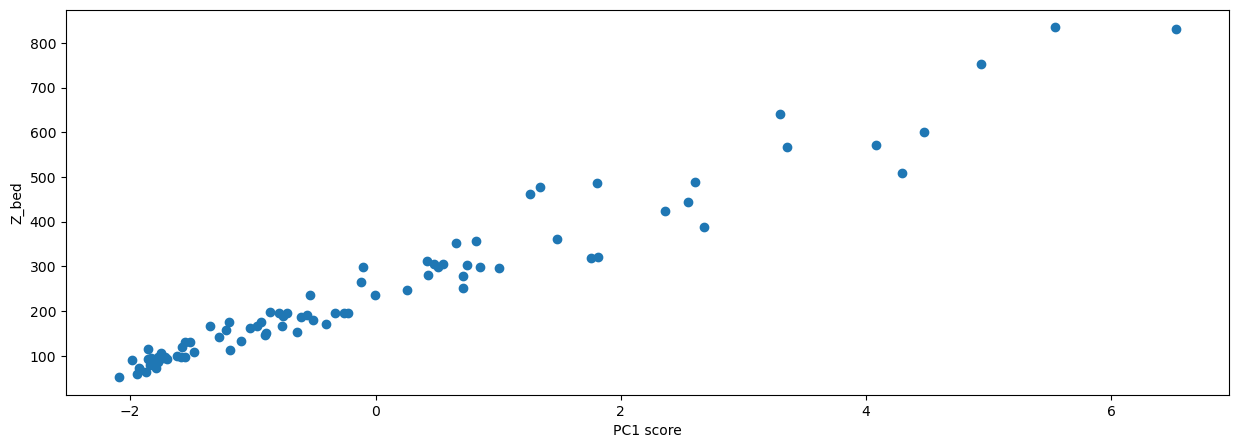

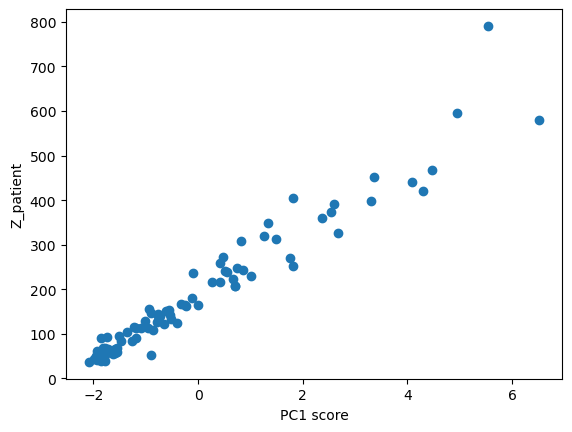

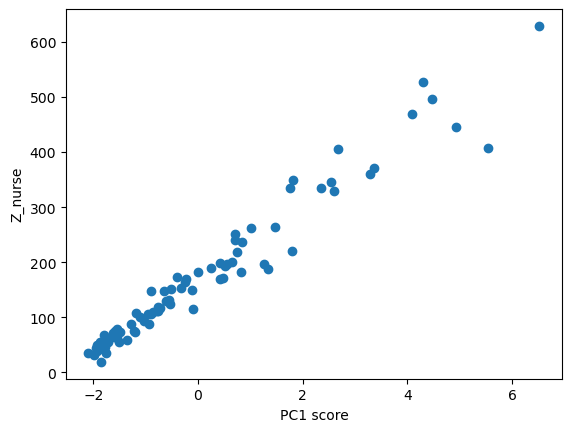

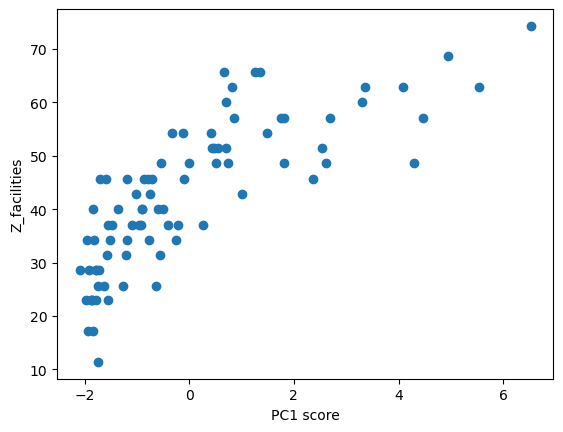

In [125]:
ig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(131)
plt.scatter(ztrain_df3.pc1, ztrain_df3.bed)
plt.xlabel('PC1 score')
plt.ylabel('Z_bed')
plt.show()
ax = fig.add_subplot(132) 
plt.scatter(ztrain_df3.pc1, ztrain_df3.patient)
plt.xlabel('PC1 score')
plt.ylabel('Z_patient')
plt.show()
ax = fig.add_subplot(133)
plt.scatter(ztrain_df3.pc1, ztrain_df3.nurse)
plt.xlabel('PC1 score')
plt.ylabel('Z_nurse');
plt.show()

ax = fig.add_subplot(133)
plt.scatter(ztrain_df3.pc1, ztrain_df3.facilities)
plt.xlabel('PC1 score')
plt.ylabel('Z_facilities');

plt.show()

In [127]:
# Fit the full MLR model.
# Type your code here:
mlr3 = smf.ols('risk ~ length0 + age0 + cultures0 + xray0 + pc1 + affiliation + region', ztrain_df3).fit()
print(mlr3.summary())
print('\nMSE =', mlr3.mse_resid)
print('\nAIC =', mlr3.aic)
print('\nBIC =', mlr3.bic)
print('\nCONDITION NUMBER =', mlr3.condition_number)
print('\nAdjusted R² =', mlr3.rsquared_adj)
print('\nR² =', mlr3.rsquared)

                            OLS Regression Results                            
Dep. Variable:                   risk   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     14.07
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           6.45e-13
Time:                        22:27:20   Log-Likelihood:                -101.50
No. Observations:                  84   AIC:                             223.0
Df Residuals:                      74   BIC:                             247.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.2355      0

NORMALITY CHECK OF RESIDUALS


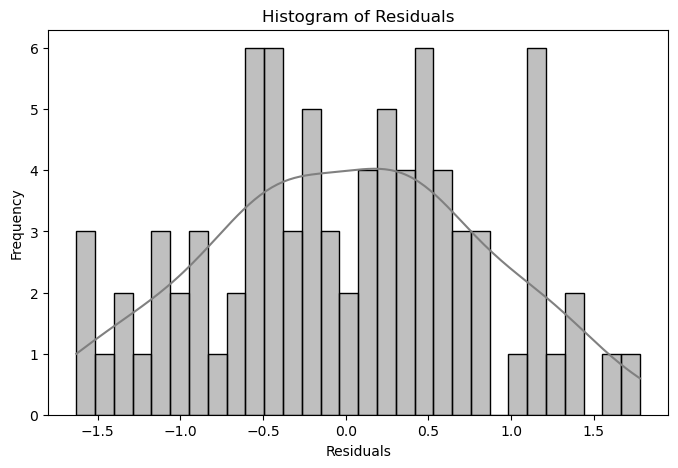

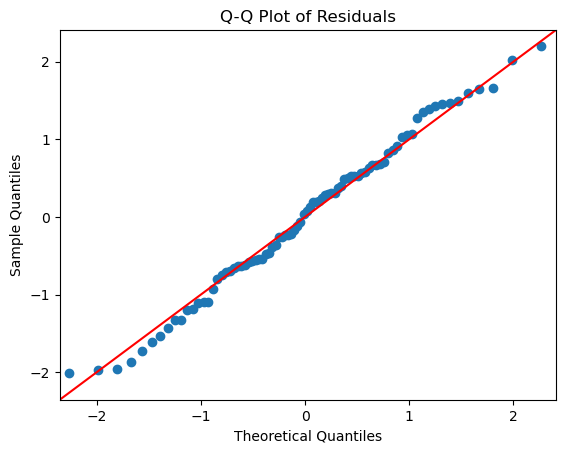


Jarque_bera = (1.4477186356780107, 0.4848773445620007, -0.027765177201453148, 2.359258027246622)

Omnibus = NormaltestResult(statistic=2.125705494781669, pvalue=0.3454688678392319)
Constant Variance (Homoscedasticity)


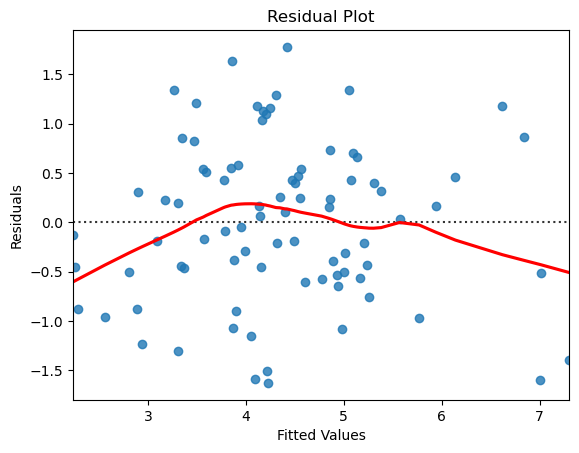


Breushpagen =  (17.78725547616661, 0.03772353011117767, 2.2088008630398606, 0.030660159577829915)
Independence check


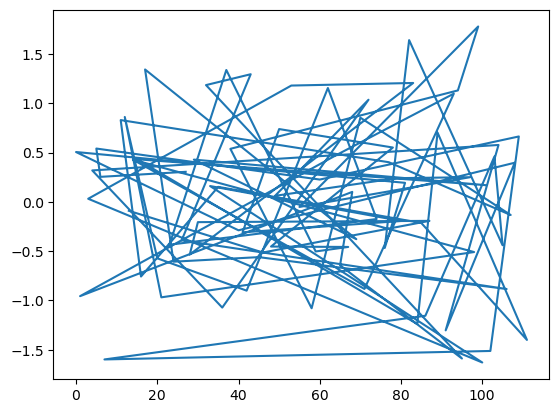


Durbin Watson =  2.2163496130327807
Multicolinearity
Intercept 5.029600964961698
affiliation[T.yes] 2.070252850323635
region[T.NE] 1.8974256001688676
region[T.S] 1.7410829457833603
region[T.W] 1.470789304476922
length0 2.122762810464227
age0 1.236112504372658
cultures0 1.4483006548848583
xray0 1.5024987744438338
pc1 2.024628816368205


In [129]:
res3 = mlr3.resid
print("\033[1;4m\033[1m\033[36mNORMALITY CHECK OF RESIDUALS\033[0m")

# Plot histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(res3, bins=30, kde=True, color="grey")
# Labels and title
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
# Show the plot
plt.show()

# Create a Q-Q plot
sm.qqplot(mlr3.resid, line='45', fit=True)
# Add labels & title
plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
# Show the plot
plt.show()

# JB test
x = sm.stats.jarque_bera(res3)
print('\nJarque_bera =',x)
# omnibus test
y = sm.stats.omni_normtest(res3)
print('\nOmnibus =',y)
print("\033[1;4m\033[1m\033[36mConstant Variance (Homoscedasticity)\033[0m")
# Residual plot
sns.residplot(x=mlr3.fittedvalues, y=res3, lowess=True, line_kws={'color': 'red'})
# Labels and title
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")

# Show the plot
plt.show()
# Perform the Breusch-Pagan test on residuals.
print('\nBreushpagen = ', sm.stats.het_breuschpagan(res3, mlr2.model.exog))
print("\033[1;4m\033[1m\033[36mIndependence check\033[0m")
plt.plot(res3)
plt.show()
print('\nDurbin Watson = ', sm.stats.durbin_watson(res3))
print("\033[1;4m\033[1m\033[36mMulticolinearity\033[0m")
for i in range(10):
    predictor = mlr3.model.exog_names[i]
    Vif = vif(mlr3.model.exog,i)
    print(predictor, Vif)

In [131]:
ztest_df3['predicted_risk'] = mlr3.predict(ztest_df3)
print(mlr3.get_prediction(ztest_df3).summary_frame())
test_r23 = mlr3.rsquared
print('\n Test R² =',test_r23)
adjusted_r23 = mlr3.rsquared_adj
print('\n  Adjusted R² =',adjusted_r23)
mspe3 = mean_squared_error(ztest_df3['risk'], ztest_df3['predicted_risk']) 
print('\n MSPE =',mspe3)

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0   5.837095  0.310067       5.219274       6.454917      4.009678   
1   4.092215  0.223669       3.646546       4.537884      2.315597   
2   4.474479  0.242599       3.991089       4.957869      2.688026   
3   3.084065  0.263938       2.558157       3.609974      1.285641   
4   5.670180  0.424013       4.825316       6.515044      3.754052   
5   4.281648  0.270598       3.742470       4.820826      2.479299   
6   6.798805  0.442001       5.918097       7.679512      4.866605   
7   4.104327  0.283022       3.540393       4.668261      2.294417   
8   4.713603  0.407896       3.900853       5.526353      2.811416   
9   3.553389  0.202466       3.149968       3.956811      1.786896   
10  3.900128  0.224379       3.453044       4.347213      2.123155   
11  4.712298  0.314541       4.085562       5.339034      2.881848   
12  3.609704  0.288910       3.034037       4.185370      1.796104   
13  4.503913  0.2844

# Polynomial regression

In [133]:
# Fit the full MLR model.
# Type your code here:
mlr4 = smf.ols('risk ~ length0 + I(age0**2) + cultures0 + xray0 + pc1 + affiliation + region', ztrain_df3).fit()
print(mlr4.summary())
print('\nMSE =', mlr4.mse_resid)
print('\nAIC =', mlr4.aic)
print('\nBIC =', mlr4.bic)
print('\nCONDITION NUMBER =', mlr4.condition_number)
print('\nAdjusted R² =', mlr4.rsquared_adj)
print('\nR² =', mlr4.rsquared)

                            OLS Regression Results                            
Dep. Variable:                   risk   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     14.06
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           6.53e-13
Time:                        22:27:41   Log-Likelihood:                -101.52
No. Observations:                  84   AIC:                             223.0
Df Residuals:                      74   BIC:                             247.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.2587      0

NORMALITY CHECK OF RESIDUALS


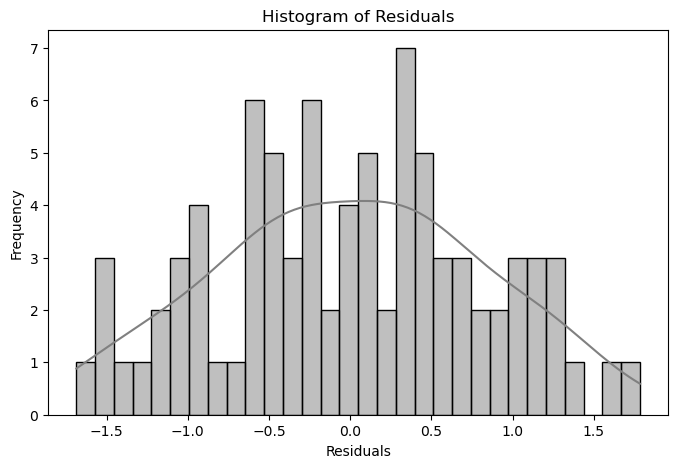

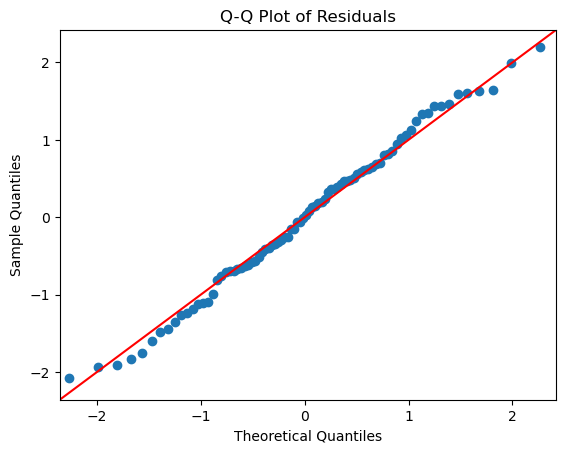


Jarque_bera = (1.5414515211914783, 0.46267715358251704, -0.02502765692719173, 2.3382529290617438)

Omnibus = NormaltestResult(statistic=2.3728657624888396, pvalue=0.3053083952538748)
Constant Variance (Homoscedasticity)


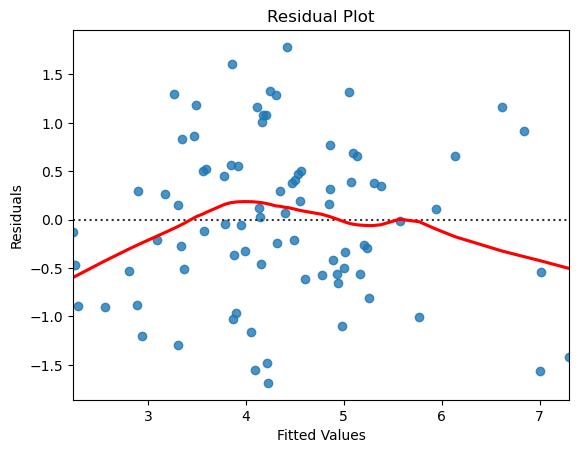


Breushpagen =  (18.579622930254967, 0.02901423364837899, 2.3351407524720855, 0.022413211026769516)
Independence check


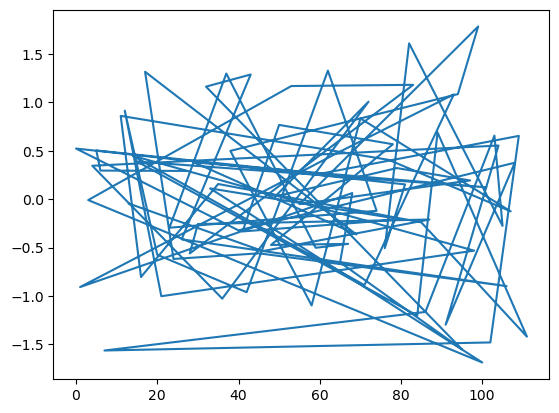


Durbin Watson =  2.2163496130327807
Multicolinearity
Intercept 5.751616881171612
affiliation[T.yes] 2.067796601666898
region[T.NE] 1.9181662206641834
region[T.S] 1.7423182729060491
region[T.W] 1.4362542693543663
length0 1.9865685719663433
I(age0 ** 2) 1.0917178207047618
cultures0 1.33909056601595
xray0 1.5376447150532955
pc1 2.0234231926993935


In [135]:
res4 = mlr4.resid
print("\033[1;4m\033[1m\033[36mNORMALITY CHECK OF RESIDUALS\033[0m")

# Plot histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(res4, bins=30, kde=True, color="grey")
# Labels and title
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
# Show the plot
plt.show()

# Create a Q-Q plot
sm.qqplot(mlr4.resid, line='45', fit=True)
# Add labels & title
plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
# Show the plot
plt.show()

# JB test
x = sm.stats.jarque_bera(res4)
print('\nJarque_bera =',x)
# omnibus test
y = sm.stats.omni_normtest(res4)
print('\nOmnibus =',y)
print("\033[1;4m\033[1m\033[36mConstant Variance (Homoscedasticity)\033[0m")
# Residual plot
sns.residplot(x=mlr3.fittedvalues, y=res4, lowess=True, line_kws={'color': 'red'})
# Labels and title
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")

# Show the plot
plt.show()
# Perform the Breusch-Pagan test on residuals.
print('\nBreushpagen = ', sm.stats.het_breuschpagan(res4, mlr4.model.exog))
print("\033[1;4m\033[1m\033[36mIndependence check\033[0m")
plt.plot(res4)
plt.show()
print('\nDurbin Watson = ', sm.stats.durbin_watson(res3))
print("\033[1;4m\033[1m\033[36mMulticolinearity\033[0m")
for i in range(10):
    predictor = mlr4.model.exog_names[i]
    Vif = vif(mlr4.model.exog,i)
    print(predictor, Vif)


In [213]:
ztest_df3['predicted_risk'] = mlr4.predict(ztest_df3)
print(mlr4.get_prediction(ztest_df3).summary_frame())
test_r24 = mlr4.rsquared
print('\n Test R² =',test_r24)
adjusted_r24 = mlr4.rsquared_adj
print('\n  Adjusted R² =',adjusted_r24)
mspe4 = mean_squared_error(ztest_df3['risk'], ztest_df3['predicted_risk']) 
print('\n MSPE =',mspe4)

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0   5.760338  0.285197       5.192071       6.328606      3.948794   
1   4.116134  0.237635       3.642637       4.589632      2.332048   
2   4.502877  0.255093       3.994594       5.011160      2.709244   
3   3.120038  0.276901       2.568301       3.671775      1.313611   
4   5.683401  0.426979       4.832626       6.534176      3.764395   
5   4.271207  0.266587       3.740020       4.802393      2.470950   
6   6.797388  0.442042       5.916599       7.678177      4.864888   
7   4.149244  0.262474       3.626254       4.672235      2.351389   
8   4.725991  0.408163       3.912710       5.539273      2.823311   
9   3.536228  0.193820       3.150032       3.922423      1.773300   
10  3.947117  0.220709       3.507345       4.386889      2.171683   
11  4.706912  0.312970       4.083305       5.330520      2.877254   
12  3.572291  0.275735       3.022877       4.121704      1.766572   
13  4.473950  0.2703

# Interaction term

/var/folders/yr/p83s49zs0lx2s00t3v0rd4pr0000gn/T/ipykernel_3385/3495757378.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', num_affiliations).colors


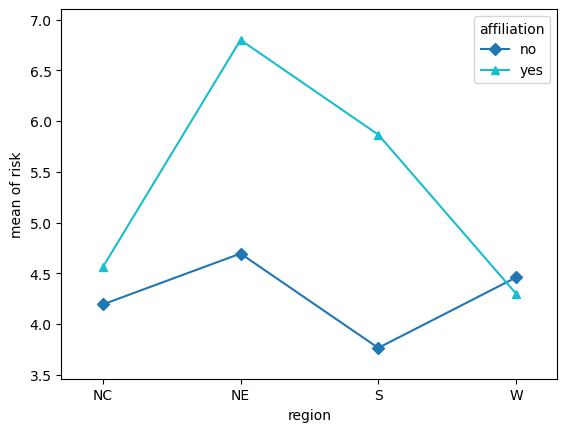

In [137]:
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

# Get unique values count for `affiliation`
num_affiliations = ztrain_df3['affiliation'].nunique()

# Generate enough colors dynamically
colors = plt.cm.get_cmap('tab10', num_affiliations).colors

# Choose enough markers (expand if needed)
markers = ['D', '^', 'o', 's', 'v', 'p', '*', 'x', '+', 'h'][:num_affiliations]

interaction_plot(
    x=ztrain_df3['region'], 
    trace=ztrain_df3['affiliation'], 
    response=ztrain_df3['risk'],
    colors=colors,  
    markers=markers
);

plt.show()

In [165]:
# Fit the full MLR model.
# Type your code here:
mlr5 = smf.ols('risk ~ length0 +age0 + cultures0 + xray0 + pc1 + affiliation + region + affiliation*region', ztrain_df3).fit()
print(mlr5.summary())
print('\nMSE =', mlr5.mse_resid)
print('\nAIC =', mlr5.aic)
print('\nBIC =', mlr5.bic)
print('\nCONDITION NUMBER =', mlr5.condition_number)
print('\nAdjusted R² =', mlr5.rsquared_adj)
print('\nR² =', mlr5.rsquared)

                            OLS Regression Results                            
Dep. Variable:                   risk   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     12.71
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           2.29e-13
Time:                        00:52:06   Log-Likelihood:                -95.216
No. Observations:                  84   AIC:                             216.4
Df Residuals:                      71   BIC:                             248.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

NORMALITY CHECK OF RESIDUALS


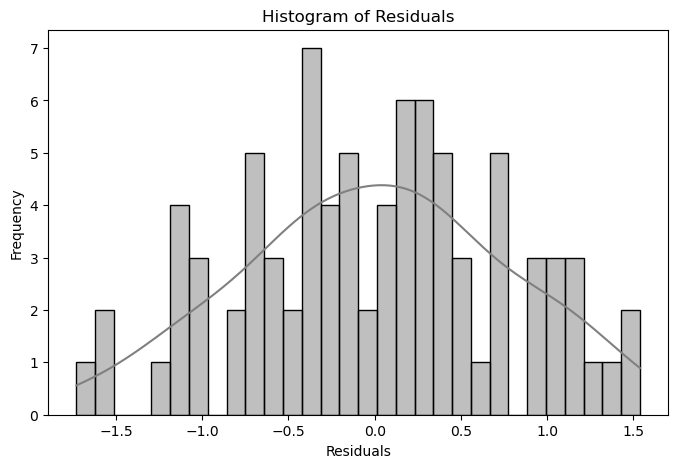

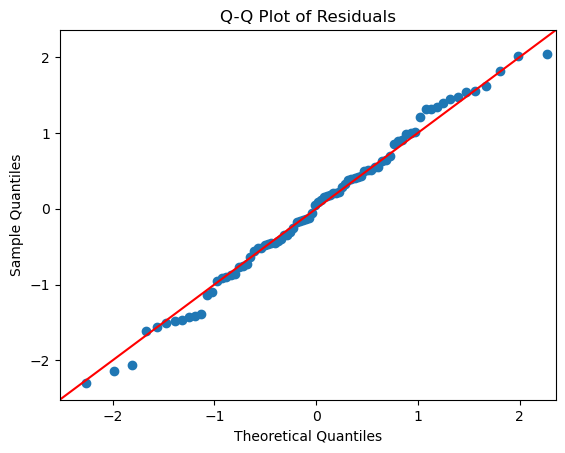


Jarque_bera = (1.0958726005221535, 0.5781416909723698, -0.08668231627579252, 2.4679744729129083)

Omnibus = NormaltestResult(statistic=1.2358686675780688, pvalue=0.539056799731696)
Constant Variance (Homoscedasticity)


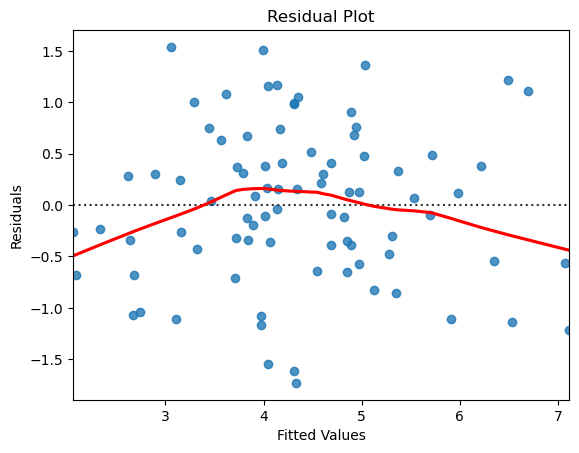


Breushpagen =  (22.20943377347504, 0.03523850897135801, 2.126632340790103, 0.025486370227371373)
Independence check


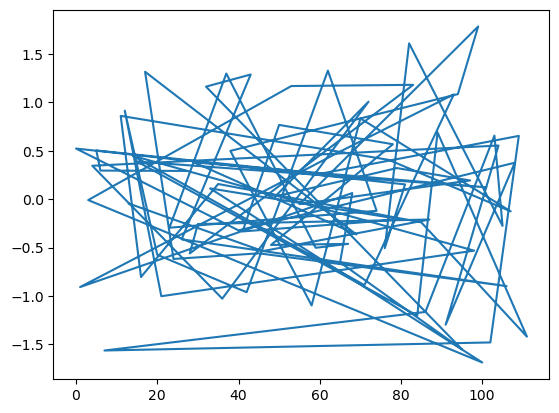


Durbin Watson =  2.2642971980123088
Multicolinearity
Intercept 5.806596003099883
affiliation[T.yes] 3.8896142914339804
region[T.NE] 2.0919487344783128
region[T.S] 2.0925732803604213
region[T.W] 1.7911032379696572
affiliation[T.yes]:region[T.NE] 1.741139541977469
affiliation[T.yes]:region[T.S] 1.8914750570207606
affiliation[T.yes]:region[T.W] 1.7395878631552852
length0 2.179297452602587
age0 1.2606100291884157
cultures0 1.5045800763703212
xray0 1.5385040633063067
pc1 2.10690950999512


In [167]:
res5 = mlr5.resid
print("\033[1;4m\033[1m\033[36mNORMALITY CHECK OF RESIDUALS\033[0m")

# Plot histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(res5, bins=30, kde=True, color="grey")
# Labels and title
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
# Show the plot
plt.show()

# Create a Q-Q plot
sm.qqplot(mlr5.resid, line='45', fit=True)
# Add labels & title
plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
# Show the plot
plt.show()

# JB test
x = sm.stats.jarque_bera(res5)
print('\nJarque_bera =',x)
# omnibus test
y = sm.stats.omni_normtest(res5)
print('\nOmnibus =',y)
print("\033[1;4m\033[1m\033[36mConstant Variance (Homoscedasticity)\033[0m")
# Residual plot
sns.residplot(x=mlr5.fittedvalues, y=res5, lowess=True, line_kws={'color': 'red'})
# Labels and title
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")

# Show the plot
plt.show()
# Perform the Breusch-Pagan test on residuals.
print('\nBreushpagen = ', sm.stats.het_breuschpagan(res5, mlr5.model.exog))
print("\033[1;4m\033[1m\033[36mIndependence check\033[0m")
plt.plot(res4)
plt.show()
print('\nDurbin Watson = ', sm.stats.durbin_watson(res5))
print("\033[1;4m\033[1m\033[36mMulticolinearity\033[0m")
for i in range(13):
    predictor = mlr5.model.exog_names[i]
    Vif = vif(mlr5.model.exog,i)
    print(predictor, Vif)

In [224]:
ztest_df3['predicted_risk'] = mlr5.predict(ztest_df3)
print(mlr5.get_prediction(ztest_df3).summary_frame())
test_r25 = mlr5.rsquared
print('\n Test R² =',test_r25)
adjusted_r25 = mlr5.rsquared_adj
print('\n  Adjusted R² =',adjusted_r25)
mspe5 = mean_squared_error(ztest_df3['risk'], ztest_df3['predicted_risk']) 
print('\n MSPE =',mspe5)

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0   5.696324  0.272204       5.153565       6.239083      3.977223   
1   4.270032  0.235266       3.800925       4.739140      2.572745   
2   4.670226  0.250186       4.171369       5.169083      2.964477   
3   3.205288  0.272459       2.662021       3.748555      1.486027   
4   5.748334  0.405924       4.938945       6.557724      3.927392   
5   4.387803  0.274050       3.841363       4.934243      2.667536   
6   6.661879  0.685157       5.295714       8.028044      4.534174   
7   4.241716  0.264529       3.714260       4.769172      2.527385   
8   4.329861  0.440385       3.451758       5.207965      2.477353   
9   3.332918  0.193303       2.947483       3.718353      1.656827   
10  3.739288  0.218530       3.303551       4.175024      2.050919   
11  4.950632  0.308117       4.336265       5.565000      3.207598   
12  3.662910  0.277438       3.109714       4.216107      1.940485   
13  4.409793  0.2634

In [163]:
# Fit the full MLR model.
# Type your code here:
mlr6 = smf.ols('risk~ length0 +I(age0**2) + cultures0 + xray0 + pc1 + affiliation + region + affiliation*region', ztrain_df3).fit()
print(mlr6.summary())
print('\nMSE =', mlr6.mse_resid)
print('\nAIC =', mlr6.aic)
print('\nBIC =', mlr6.bic)
print('\nCONDITION NUMBER =', mlr6.condition_number)
print('\nAdjusted R² =', mlr6.rsquared_adj)
print('\nR² =', mlr6.rsquared)

                            OLS Regression Results                            
Dep. Variable:                   risk   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     12.69
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           2.37e-13
Time:                        00:51:48   Log-Likelihood:                -95.261
No. Observations:                  84   AIC:                             216.5
Df Residuals:                      71   BIC:                             248.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

NORMALITY CHECK OF RESIDUALS


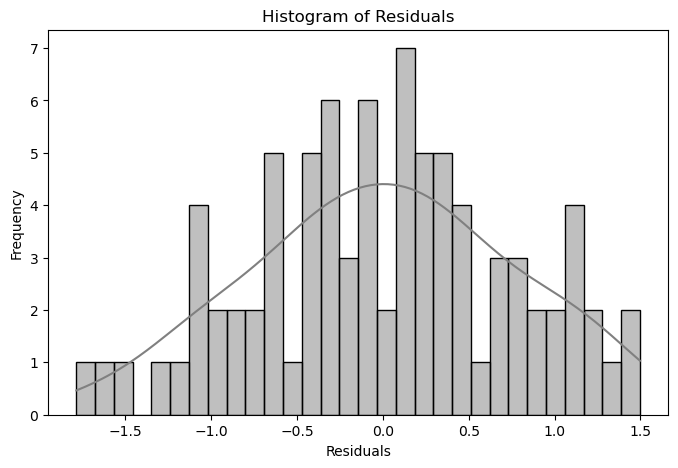

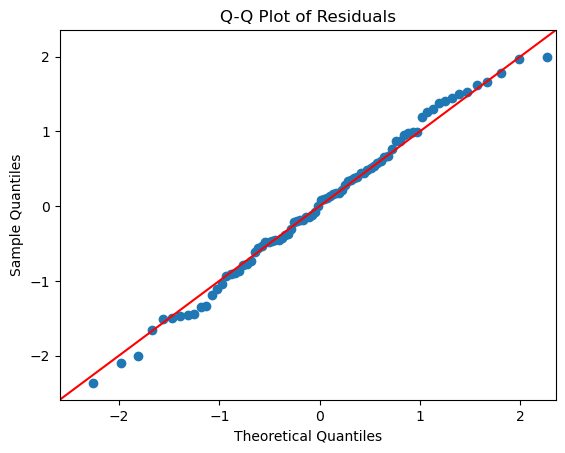


Jarque_bera = (1.1938430411220637, 0.5505037446559691, -0.08738391252499567, 2.442726082544269)

Omnibus = NormaltestResult(statistic=1.43077038438274, pvalue=0.48900371510158513)
Constant Variance (Homoscedasticity)


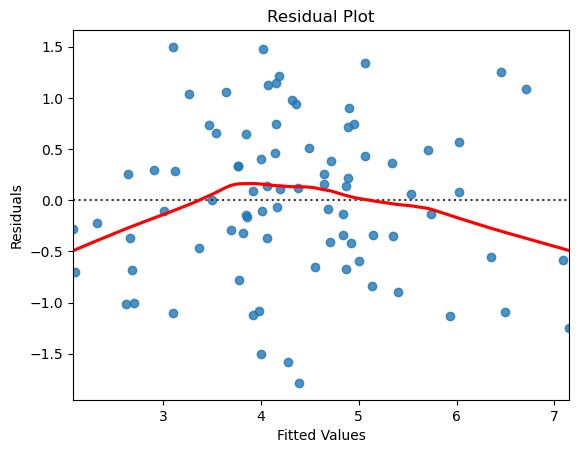


Breushpagen =  (24.329617226362444, 0.018339343240019273, 2.4124235267948575, 0.01103283618306517)
Independence check


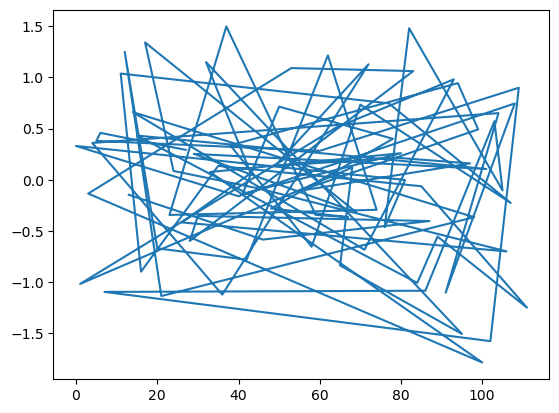


Durbin Watson =  2.2549376659503215
Multicolinearity
Intercept 6.44728348329018
affiliation[T.yes] 3.821069285518572
region[T.NE] 2.1127648819109544
region[T.S] 2.094267141559858
region[T.W] 1.7741415817937383
affiliation[T.yes]:region[T.NE] 1.7164142607387758
affiliation[T.yes]:region[T.S] 1.8929779584648658
affiliation[T.yes]:region[T.W] 1.741922580855095
length0 2.077559296994516
I(age0 ** 2) 1.0994650540498083
cultures0 1.3756722779553352
xray0 1.5694448451575878
pc1 2.106986901114561


In [169]:
res6 = mlr6.resid
print("\033[1;4m\033[1m\033[36mNORMALITY CHECK OF RESIDUALS\033[0m")

# Plot histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(res6, bins=30, kde=True, color="grey")
# Labels and title
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
# Show the plot
plt.show()

# Create a Q-Q plot
sm.qqplot(mlr6.resid, line='45', fit=True)
# Add labels & title
plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
# Show the plot
plt.show()

# JB test
x = sm.stats.jarque_bera(res6)
print('\nJarque_bera =',x)
# omnibus test
y = sm.stats.omni_normtest(res6)
print('\nOmnibus =',y)
print("\033[1;4m\033[1m\033[36mConstant Variance (Homoscedasticity)\033[0m")
# Residual plot
sns.residplot(x=mlr6.fittedvalues, y=res6, lowess=True, line_kws={'color': 'red'})
# Labels and title
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")

# Show the plot
plt.show()
# Perform the Breusch-Pagan test on residuals.
print('\nBreushpagen = ', sm.stats.het_breuschpagan(res6, mlr6.model.exog))
print("\033[1;4m\033[1m\033[36mIndependence check\033[0m")
plt.plot(res6)
plt.show()
print('\nDurbin Watson = ', sm.stats.durbin_watson(res6))
print("\033[1;4m\033[1m\033[36mMulticolinearity\033[0m")
for i in range(13):
    predictor = mlr6.model.exog_names[i]
    Vif = vif(mlr6.model.exog,i)
    print(predictor, Vif)

In [171]:
ztest_df3['predicted_risk'] = mlr6.predict(ztest_df3)
print(mlr6.get_prediction(ztest_df3).summary_frame())
test_r26 = mlr6.rsquared
print('\n Test R² =',test_r26)
adjusted_r26 = mlr6.rsquared_adj
print('\n  Adjusted R² =',adjusted_r26)
mspe6 = mean_squared_error(ztest_df3['risk'], ztest_df3['predicted_risk']) 
print('\n MSPE =',mspe6)

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0   5.696324  0.272204       5.153565       6.239083      3.977223   
1   4.270032  0.235266       3.800925       4.739140      2.572745   
2   4.670226  0.250186       4.171369       5.169083      2.964477   
3   3.205288  0.272459       2.662021       3.748555      1.486027   
4   5.748334  0.405924       4.938945       6.557724      3.927392   
5   4.387803  0.274050       3.841363       4.934243      2.667536   
6   6.661879  0.685157       5.295714       8.028044      4.534174   
7   4.241716  0.264529       3.714260       4.769172      2.527385   
8   4.329861  0.440385       3.451758       5.207965      2.477353   
9   3.332918  0.193303       2.947483       3.718353      1.656827   
10  3.739288  0.218530       3.303551       4.175024      2.050919   
11  4.950632  0.308117       4.336265       5.565000      3.207598   
12  3.662910  0.277438       3.109714       4.216107      1.940485   
13  4.409793  0.2634